### Problem Statement : 

 + Outlier analysis using K-mean clustering

<a id="1"></a>
### <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Important libraries</p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import skew
from sklearn import preprocessing
import scipy.stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import Collecting_featured_Data_of_CYGNSS_with_SMAP_SM
import imp
imp.reload(Collecting_featured_Data_of_CYGNSS_with_SMAP_SM)
import Collecting_featured_Data_of_CYGNSS_with_SMAP_SM as FD

<a id="1"></a>
### <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;"> Importing the Dataset</p>

In [3]:
dataset = FD.Monthly_Featured_Data(8) # Month August
dataset = dataset[:1000]

#### Header information of Data

In [4]:
dataset.head()

SMAP_Latitude  SMAP_Longitude  SMAP_Incination    ddm_snr  \
0      30.966091       73.008300        32.534944   9.569815   
1      30.966091       73.381744        46.102681   6.450545   
2      30.966091       73.755190        44.024018 -11.135013   
3      30.966091       74.128630        39.629601  -7.216905   
4      30.966091       74.502075        34.059116  11.630496   

   gps_tx_power_db_w  gps_ant_gain_db_i  SMAP_SP_RX_Gain  rx_to_sp_range  \
0          16.350543          15.684829         8.507338   621506.605295   
1          16.353704          16.609209        -2.264461   719683.932236   
2          16.132194          16.285606       -17.741603   742242.759811   
3          15.631957          16.005097       -14.035985   709846.025058   
4          15.154190          15.844456         2.088485   644579.174351   

   tx_to_sp_range      DDM_Peak   SMAP_SM  
0    2.085301e+07  5.580034e-17  0.229794  
1    2.170806e+07  2.996239e-17  0.278490  
2    2.206175e+07 -3.167632e-16  0.322291  
3    2.182126e+07  1.770377e-16  0.327379  
4    2.119202e+07  1.116436e-15  0.412700

+ This is structured data as it is in the form of tabular format

In [5]:
dataset.shape

(1000, 11)

In [6]:
dataset.keys()

Index(['SMAP_Latitude', 'SMAP_Longitude', 'SMAP_Incination', 'ddm_snr',
       'gps_tx_power_db_w', 'gps_ant_gain_db_i', 'SMAP_SP_RX_Gain',
       'rx_to_sp_range', 'tx_to_sp_range', 'DDM_Peak', 'SMAP_SM'],
      dtype='object')

#### Description of the datatypes within the attributes

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 780
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SMAP_Latitude      1000 non-null   float64
 1   SMAP_Longitude     1000 non-null   float64
 2   SMAP_Incination    1000 non-null   float64
 3   ddm_snr            1000 non-null   float64
 4   gps_tx_power_db_w  1000 non-null   float64
 5   gps_ant_gain_db_i  1000 non-null   float64
 6   SMAP_SP_RX_Gain    1000 non-null   float64
 7   rx_to_sp_range     1000 non-null   float64
 8   tx_to_sp_range     1000 non-null   float64
 9   DDM_Peak           1000 non-null   float64
 10  SMAP_SM            1000 non-null   float64
dtypes: float64(11)
memory usage: 93.8 KB


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">1. Data Cleaning</p>

### (a) Taking care of duplicate values

#### Checking and removing duplicate Values
+ This can create redundancy in the data
+ Checking and removing duplicate Values

In [8]:
dataset.duplicated().sum()

dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

### (b) Dealing with Missing Data

In [9]:
dataset.isnull().sum().sum()

0

### Note :
+ Dataset contains no null or duplicated values

### (c) Visualization of the data

#### Measuring Central Tendency of the data

In [10]:
dataset.describe()

SMAP_Latitude  SMAP_Longitude  SMAP_Incination     ddm_snr  \
count     994.000000      994.000000       994.000000  994.000000   
mean       26.743017       80.908856        41.986251    6.212165   
std         2.599340        5.562989        55.750393   11.344197   
min        21.229897       73.008300      -802.161629 -135.362987   
25%        24.596556       74.502075        25.107369    0.833559   
50%        26.785158       82.344400        41.311356    3.735779   
75%        29.015890       85.705390        58.522142   11.115829   
max        30.966091       88.692950       534.738458  140.955082   

       gps_tx_power_db_w  gps_ant_gain_db_i  SMAP_SP_RX_Gain  rx_to_sp_range  \
count         994.000000         994.000000       994.000000    9.940000e+02   
mean           15.620608          15.774861         2.909168    7.272173e+05   
std             2.444174           2.024668        21.677386    5.522143e+05   
min           -23.117496           1.292126      -255.414174   -4.492858e+06   
25%            14.937691          14.882832        -2.460621    5.617803e+05   
50%            15.798262          15.639431         5.232201    6.772012e+05   
75%            16.409389          16.415583         9.390541    8.930634e+05   
max            35.338284          38.594631       163.143683    7.173694e+06   

       tx_to_sp_range      DDM_Peak     SMAP_SM  
count    9.940000e+02  9.940000e+02  994.000000  
mean     2.160609e+07  9.843160e-17    0.286277  
std      3.017276e+06  4.420270e-16    0.138679  
min     -1.491936e+07 -3.512988e-15    0.020000  
25%      2.058416e+07  1.073128e-18    0.165711  
50%      2.148408e+07  7.494024e-18    0.256882  
75%      2.256531e+07  1.110825e-16    0.429245  
max      5.355770e+07  4.881721e-15    0.547377

### Distribution of the attributes of the data using violin and box-plot

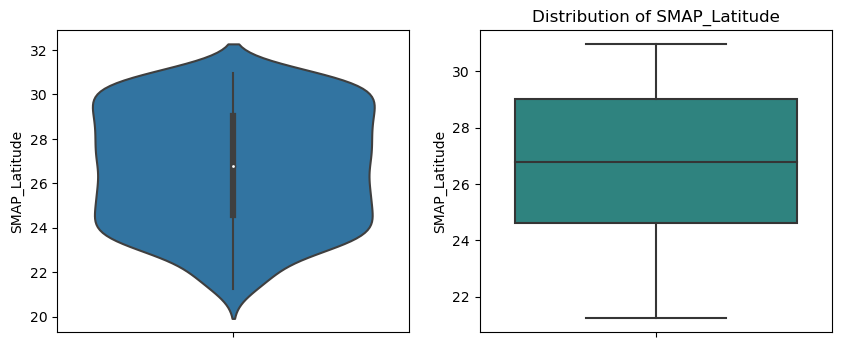

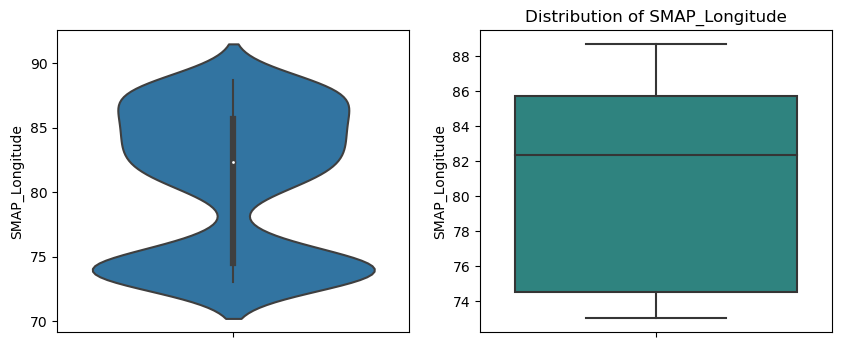

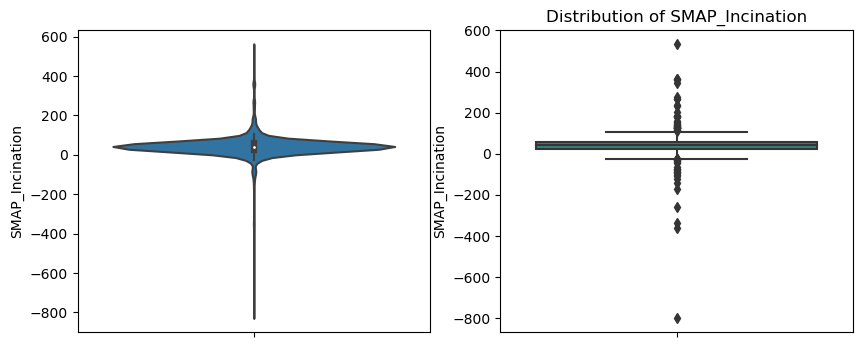

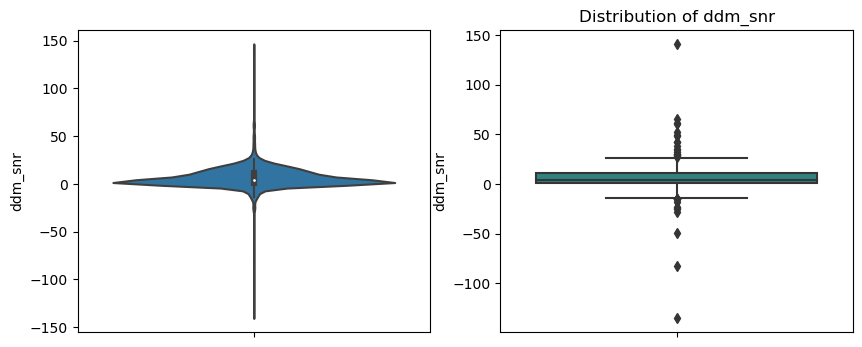

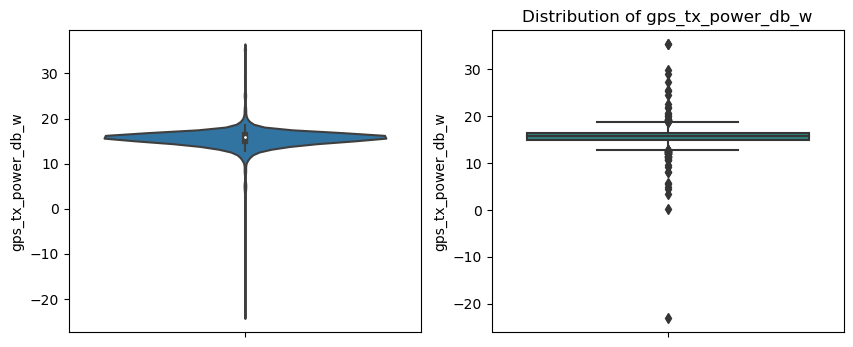

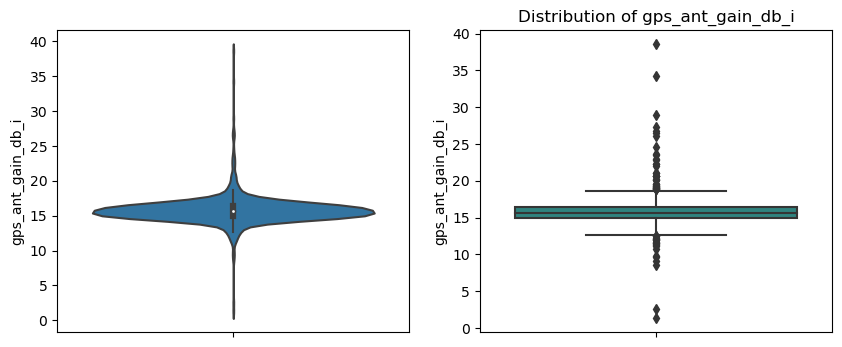

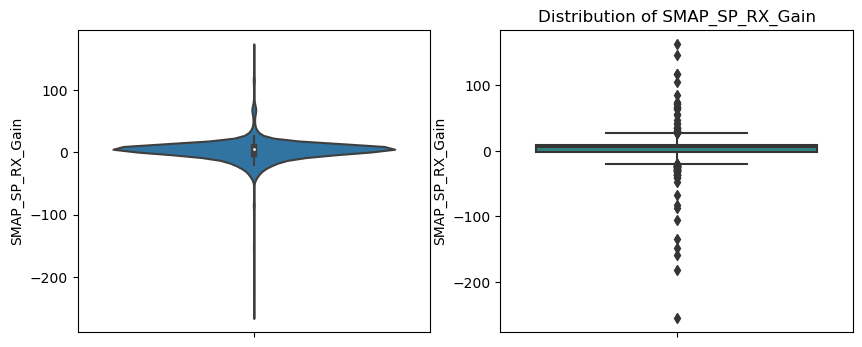

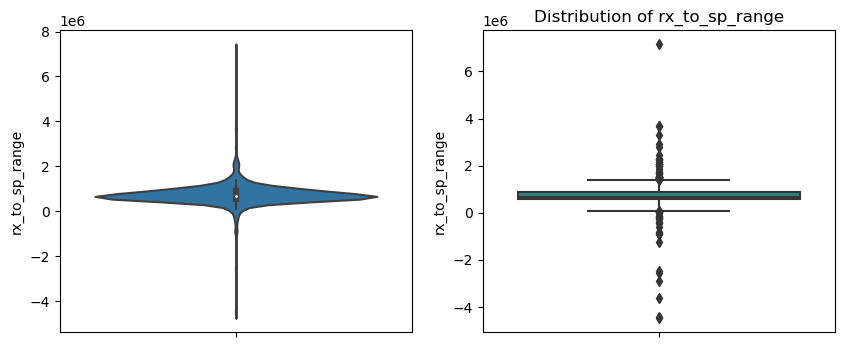

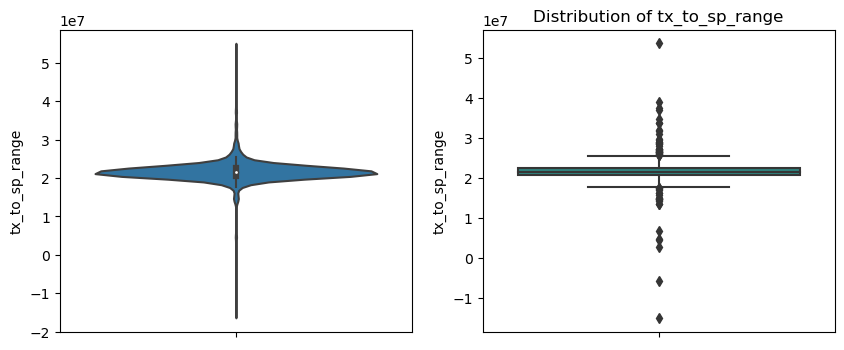

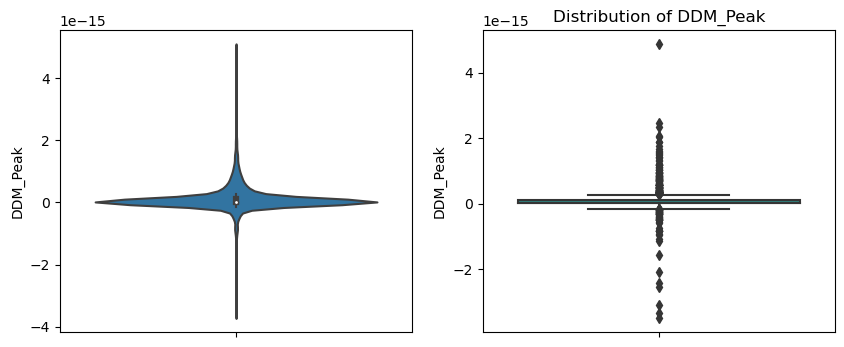

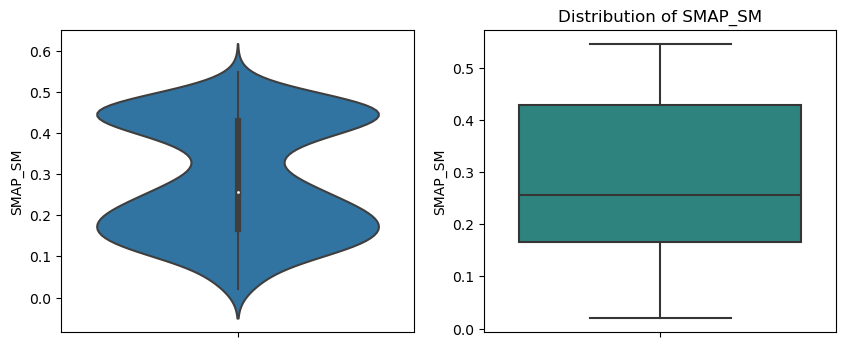

In [11]:
attribute2 = dataset.keys()
for i in range(len(attribute2)):
    var = str(attribute2[i])
    plt.figure(figsize=(10,4),dpi=100)
    plt.subplot(1,2,1)
    sns.violinplot(y = dataset[f'{var}'])
    plt.subplot(1,2,2)
    sns.boxplot(data=dataset, y = f'{var}', palette='viridis')
    plt.title(f'''Distribution of {var}''')

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Clustering</p>

## K-mean clustering

### Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transformed = scaler.fit_transform(dataset)
X_transformed

array([[ 1.62548955, -1.42091485, -0.16961432, ..., -0.24971552,
        -0.09649347, -0.40749825],
       [ 1.62548955, -1.35375096,  0.07387395, ...,  0.03381233,
        -0.15497622, -0.05618428],
       [ 1.62548955, -1.2865867 ,  0.03657002, ...,  0.15109245,
        -0.93977024,  0.25982016],
       ...,
       [-1.41912149,  0.86265652,  0.06760424, ...,  0.00518757,
         0.97598922,  1.10142668],
       [-1.41912149,  0.9298206 ,  0.64722862, ...,  0.77678501,
        -1.19557053,  1.22079914],
       [-1.41912149,  0.99698575,  0.49987842, ...,  0.6312353 ,
        -0.27150744,  1.04125721]])

### Estimate the number of clusters present by the elbow method

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores = []
s_scores = []
for i in range(2,15):    
    model = KMeans(n_clusters = i)
    model.fit(X_transformed)
    scores.append(model.inertia_)
    labels = model.labels_
    s_scores.append(silhouette_score(X_transformed,labels))

Text(0.5, 1.0, 'Score vs number of Clusters')

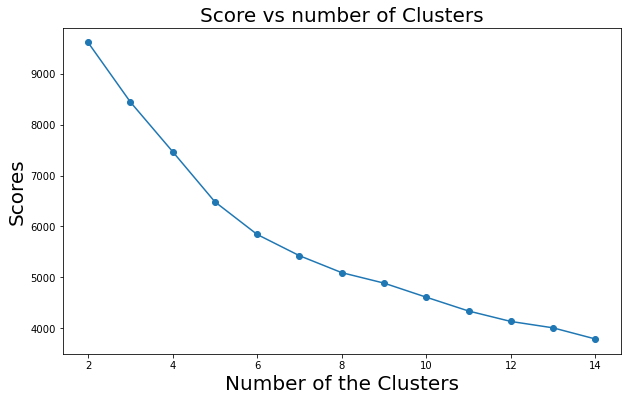

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),scores,marker='o')
plt.xlabel('''Number of the Clusters''',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.title(f'Score vs number of Clusters',fontsize=20)

Text(0.5, 1.0, 'Score vs number of Clusters')

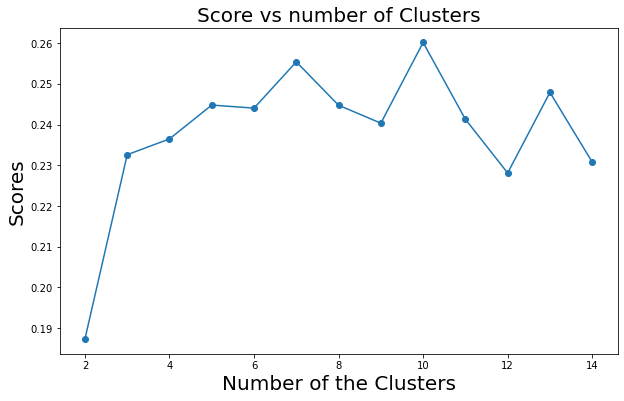

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),s_scores,marker='o')
plt.xlabel('''Number of the Clusters''',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.title(f'Score vs number of Clusters',fontsize=20)

+ Take number of clusters or warehouses = 10
+ Silhoute score is not very good

## Finding the Core Points of the clusters

In [16]:
model = KMeans(n_clusters = 10,random_state=0)
model.fit(X_transformed)

labels  = model.labels_
centers = scaler.inverse_transform(model.cluster_centers_)
print(centers)

[[ 2.57679180e+01  7.99970357e+01 -1.48522131e+02  5.40619473e+01
   1.38913467e+01  2.03821487e+01  9.71341747e+01 -1.89126337e+06
   9.52118668e+06  9.57088164e-16  3.26469586e-01]
 [ 2.73912226e+01  8.06639006e+01  2.33337747e+02 -2.61203310e+00
   2.09773911e+01  2.31072438e+01 -5.80947728e+00  2.32438110e+06
   3.11824318e+07 -6.52782916e-16  2.67731703e-01]
 [ 2.60841859e+01  7.99956330e+01  9.48226933e+01 -7.85667348e+00
   1.50823261e+01  1.61687304e+01 -4.15867851e+01  1.34479902e+06
   2.48970202e+07 -3.84285007e-16  3.17250390e-01]
 [ 2.53818208e+01  8.41843283e+01  5.06774650e+01  7.32846247e+00
   1.58797326e+01  1.58683800e+01  9.55883640e-01  8.27213546e+05
   2.21517217e+07  5.82388254e-17  4.32065153e-01]
 [ 2.41530640e+01  7.76763495e+01  4.39359431e+02 -1.08759383e+02
   1.50525585e+01  3.10198696e+01 -1.32634071e+02  5.42475943e+06
   4.62782874e+07 -2.59750546e-15  3.35574820e-01]
 [ 2.38142503e+01  7.39701352e+01  3.24234385e+01  5.55869243e+00
   1.45636909e+01  

In [17]:
for i, col in enumerate(dataset.columns):
    print(col, round(centers[0,i],2), 
          round(centers[1,i],2), 
          round(centers[2,i],2),
          round(centers[3,i],2), 
          round(centers[4,i],2), 
          round(centers[5,i],2),
          round(centers[6,i],2), 
          round(centers[7,i],2),
          round(centers[8,i],2), 
          round(centers[9,i],2)
         )

SMAP_Latitude 25.77 27.39 26.08 25.38 24.15 23.81 28.54 29.47 28.51 26.45
SMAP_Longitude 80.0 80.66 80.0 84.18 77.68 73.97 79.54 85.76 74.16 82.62
SMAP_Incination -148.52 233.34 94.82 50.68 439.36 32.42 -582.04 39.13 42.91 15.81
ddm_snr 54.06 -2.61 -7.86 7.33 -108.76 5.56 4.27 0.99 6.81 19.98
gps_tx_power_db_w 13.89 20.98 15.08 15.88 15.05 14.56 -3.59 15.69 15.79 16.25
gps_ant_gain_db_i 20.38 23.11 16.17 15.87 31.02 15.37 1.95 15.7 15.8 14.95
SMAP_SP_RX_Gain 97.13 -5.81 -41.59 0.96 -132.63 4.61 64.58 2.9 5.96 12.46
rx_to_sp_range -1891263.37 2324381.1 1344799.02 827213.55 5424759.43 623113.5 -4459415.21 682010.58 730204.26 513906.72
tx_to_sp_range 9521186.68 31182431.78 24897020.21 22151721.67 46278287.39 21098721.58 -10267435.79 21390570.11 21584510.41 20194938.99
DDM_Peak 0.0 -0.0 -0.0 0.0 -0.0 0.0 0.0 -0.0 0.0 0.0
SMAP_SM 0.33 0.27 0.32 0.43 0.34 0.18 0.16 0.2 0.17 0.43


## Identifying the data points for the clusters

In [18]:
prediction_pca = model.fit_predict(dataset)
prediction_pca

array([8, 1, 1, 1, 8, 8, 3, 8, 1, 1, 8, 8, 8, 8, 8, 1, 8, 8, 8, 0, 3, 8,
       8, 8, 8, 8, 8, 8, 8, 3, 0, 9, 8, 1, 8, 8, 1, 8, 8, 8, 8, 8, 1, 1,
       3, 1, 8, 8, 8, 8, 3, 8, 1, 3, 8, 0, 8, 1, 1, 3, 8, 1, 1, 1, 8, 1,
       1, 8, 3, 0, 1, 8, 0, 0, 8, 8, 7, 0, 0, 0, 8, 8, 1, 1, 0, 8, 8, 0,
       3, 1, 8, 8, 7, 8, 0, 1, 0, 5, 0, 1, 7, 1, 8, 8, 8, 0, 8, 0, 1, 1,
       0, 1, 8, 6, 0, 7, 8, 0, 1, 1, 0, 1, 8, 3, 0, 8, 8, 1, 1, 0, 1, 7,
       1, 0, 8, 8, 8, 8, 7, 8, 9, 0, 0, 0, 0, 0, 0, 7, 7, 9, 1, 0, 0, 7,
       0, 2, 3, 1, 8, 1, 1, 9, 8, 8, 8, 8, 8, 7, 1, 0, 1, 0, 1, 7, 8, 3,
       8, 1, 0, 8, 8, 9, 3, 3, 3, 8, 1, 8, 1, 3, 8, 1, 1, 8, 8, 1, 1, 8,
       1, 1, 8, 8, 1, 1, 1, 1, 8, 1, 1, 1, 8, 8, 1, 1, 1, 0, 0, 8, 1, 8,
       8, 8, 8, 1, 8, 8, 1, 8, 0, 1, 5, 8, 8, 8, 1, 8, 8, 7, 1, 8, 8, 0,
       0, 7, 8, 3, 9, 0, 0, 0, 0, 1, 1, 1, 8, 8, 1, 8, 8, 8, 1, 1, 3, 1,
       8, 8, 1, 1, 0, 0, 0, 1, 1, 8, 1, 1, 1, 8, 3, 1, 0, 7, 8, 0, 8, 8,
       1, 7, 3, 8, 8, 9, 1, 8, 3, 1, 0, 3, 1, 8, 8,

In [19]:
clustered_data_pca = dataset.copy()
clustered_data_pca["cluster_index"] = prediction_pca
clustered_data_pca

SMAP_Latitude  SMAP_Longitude  SMAP_Incination    ddm_snr  \
0        30.966091       73.008300        32.534944   9.569815   
1        30.966091       73.381744        46.102681   6.450545   
2        30.966091       73.755190        44.024018 -11.135013   
3        30.966091       74.128630        39.629601  -7.216905   
4        30.966091       74.502075        34.059116  11.630496   
..             ...             ...              ...        ...   
776      23.056093       84.958500        59.547520  10.446341   
777      23.056093       85.331950        38.941196   8.771620   
778      23.056093       85.705390        45.753318  18.031425   
779      23.056093       86.078835        78.051346 -12.779264   
780      23.056093       86.452286        69.840648 -13.458198   

     gps_tx_power_db_w  gps_ant_gain_db_i  SMAP_SP_RX_Gain  rx_to_sp_range  \
0            16.350543          15.684829         8.507338    6.215066e+05   
1            16.353704          16.609209        -2.264461    7.196839e+05   
2            16.132194          16.285606       -17.741603    7.422428e+05   
3            15.631957          16.005097       -14.035985    7.098460e+05   
4            15.154190          15.844456         2.088485    6.445792e+05   
..                 ...                ...              ...             ...   
776          14.112327          16.090721         9.579516    8.772692e+05   
777          15.736243          16.058942        10.723824    6.493522e+05   
778          16.340108          16.630396         9.014142    7.097137e+05   
779          15.202698          16.535544       -37.178087    1.113473e+06   
780          14.482986          15.661846       -33.764602    1.107664e+06   

     tx_to_sp_range      DDM_Peak   SMAP_SM  cluster_index  
0      2.085301e+07  5.580034e-17  0.229794              8  
1      2.170806e+07  2.996239e-17  0.278490              1  
2      2.206175e+07 -3.167632e-16  0.322291              1  
3      2.182126e+07  1.770377e-16  0.327379              1  
4      2.119202e+07  1.116436e-15  0.412700              8  
..              ...           ...       ...            ...  
776    2.221418e+07  1.235417e-16  0.373126              1  
777    2.205013e+07  1.554306e-17  0.433044              1  
778    2.162174e+07  5.296281e-16  0.438945              1  
779    2.394869e+07 -4.297770e-16  0.455492              0  
780    2.350974e+07 -2.152164e-17  0.430605              0  

[994 rows x 12 columns]

## Plot distribution of data points among clusters

In [25]:
Keys = dataset.keys()[2:]
def Plot_points_with_clusters(dataset,Keys):
    for i in range(len(Keys)):
        for j in range(len(Keys)):
            plt.figure(figsize=(10,6))
            plt.scatter(x=dataset[f'{Keys[i]}'],y=dataset[f'{Keys[j]}'],label='Data points')
            plt.scatter(x=centers[:,1],y=centers[:,0],label='Centre of the clusters')
            plt.legend()
            plt.ylabel(f'{Keys[j]}',fontsize=20)
            plt.xlabel(f'{Keys[i]}',fontsize=20)
            plt.title(f'Data points for {Keys[i]} and {Keys[j]} and the clusters',fontsize=10)

            plt.figure(figsize=(10,6))
            sns.scatterplot(x=clustered_data_pca[f'{Keys[i]}'],y=clustered_data_pca[f'{Keys[j]}'],hue=clustered_data_pca.cluster_index,
                            palette="deep")
            plt.ylabel(f'{Keys[j]}',fontsize=20)
            plt.xlabel(f'{Keys[i]}',fontsize=20)
            plt.title(f'Data points for {Keys[i]} and {Keys[j]} and the clusters',fontsize=10)

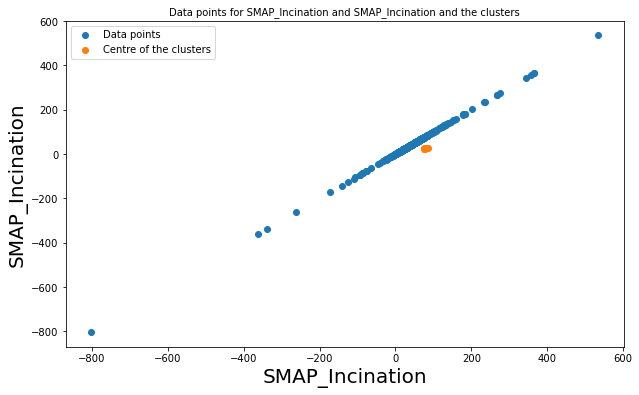

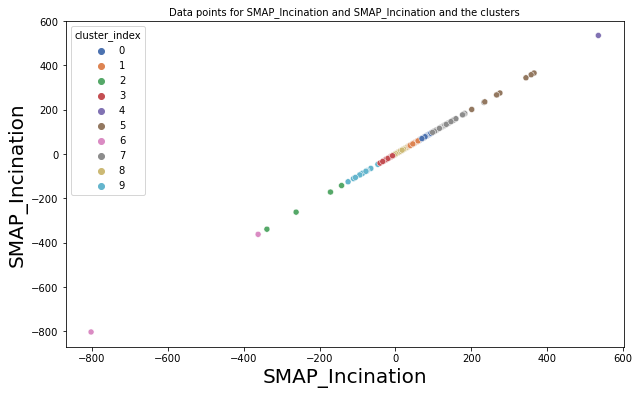

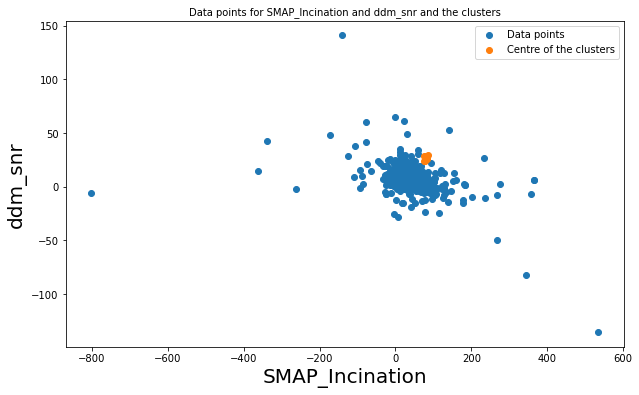

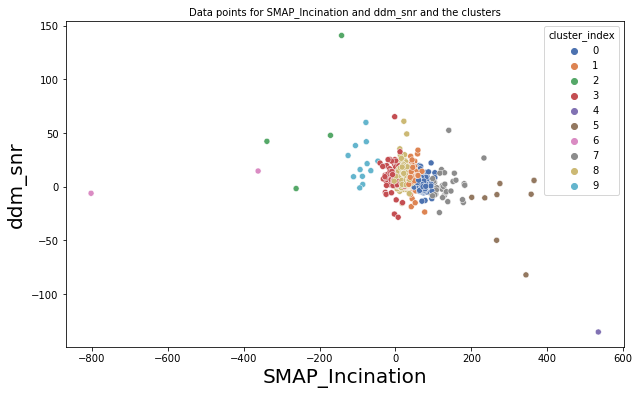

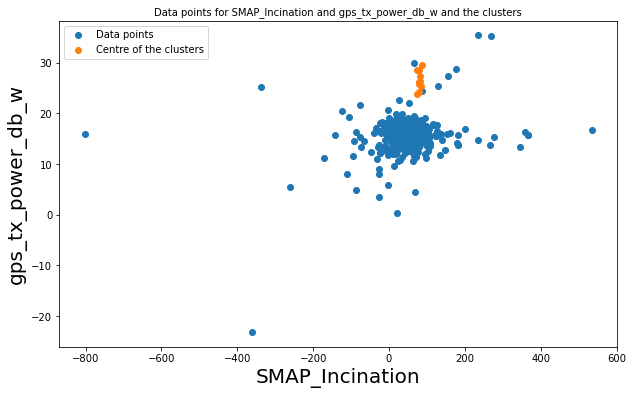

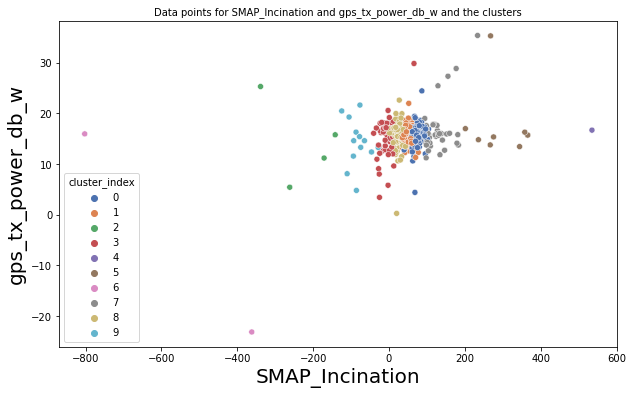

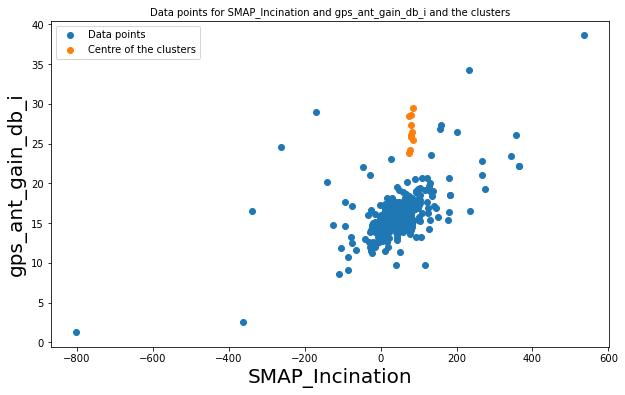

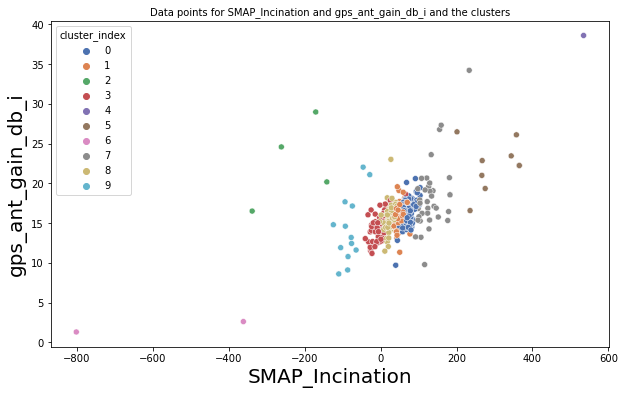

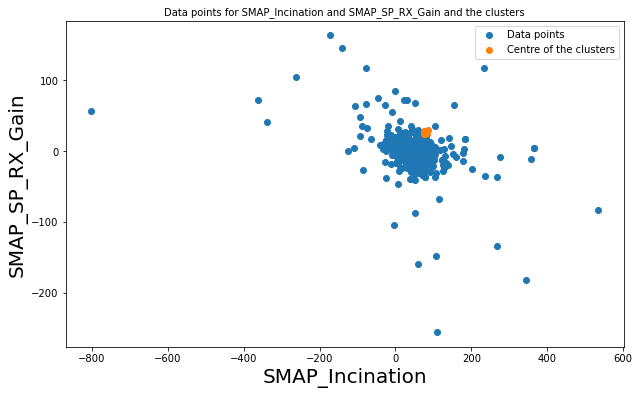

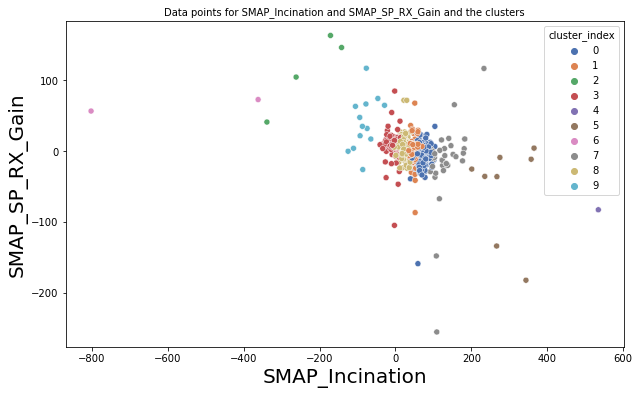

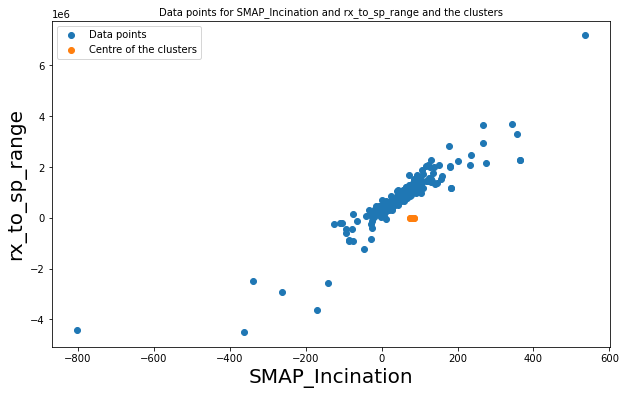

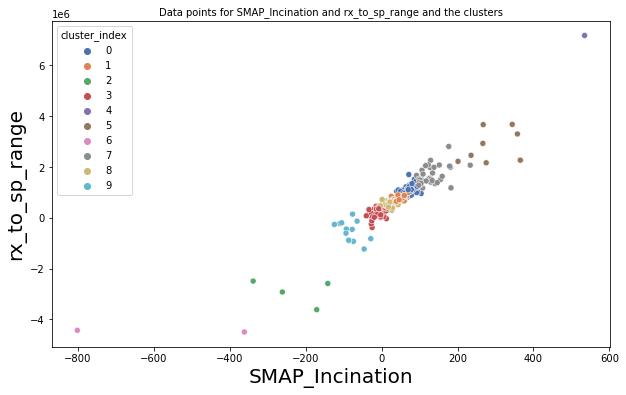

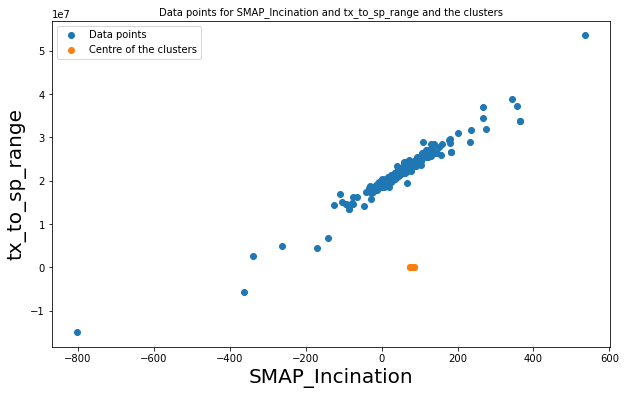

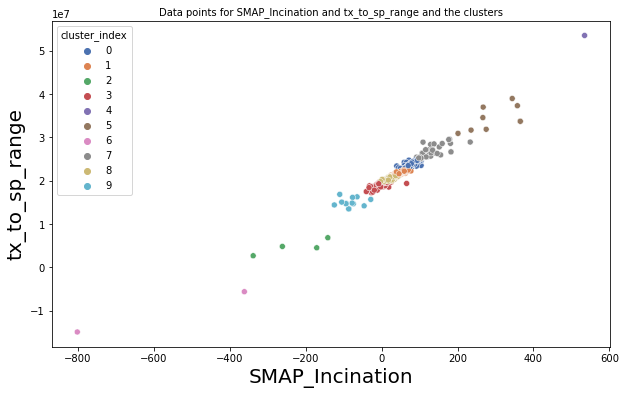

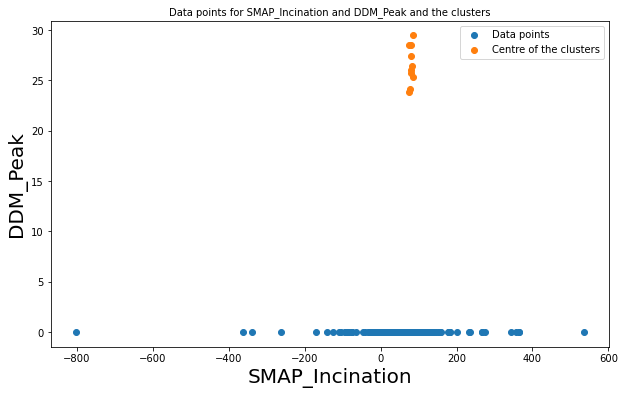

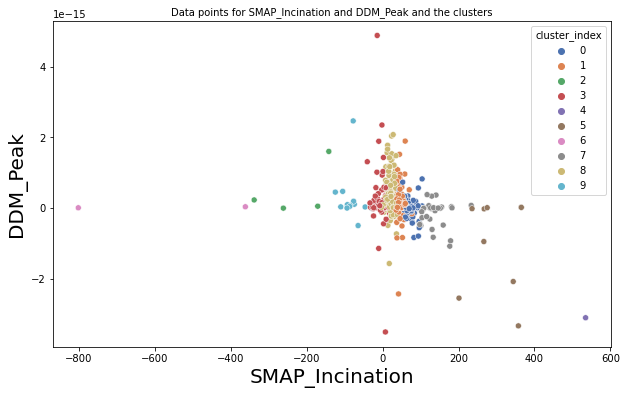

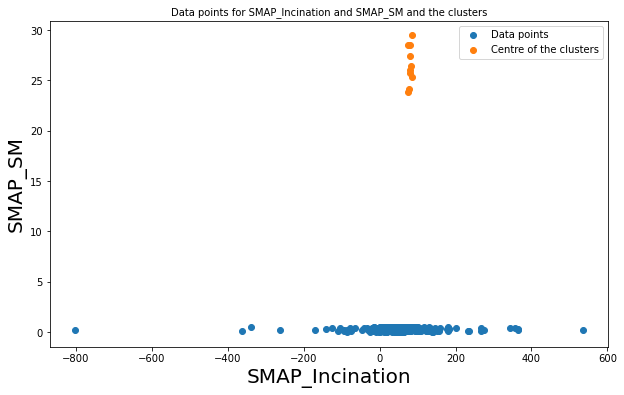

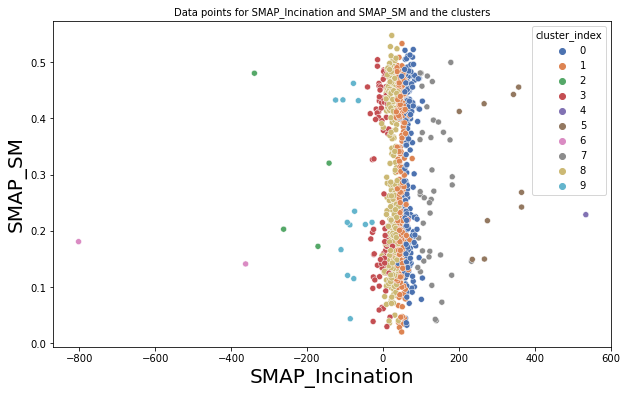

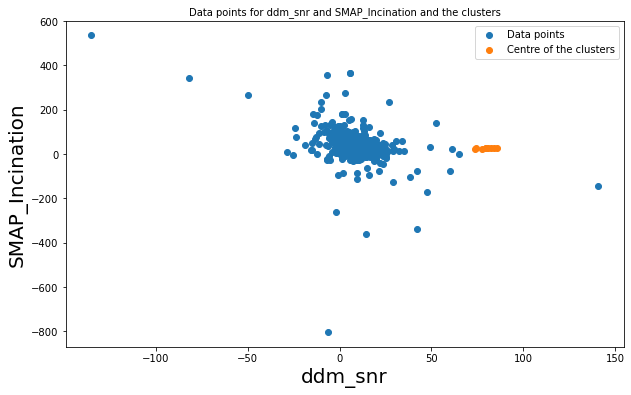

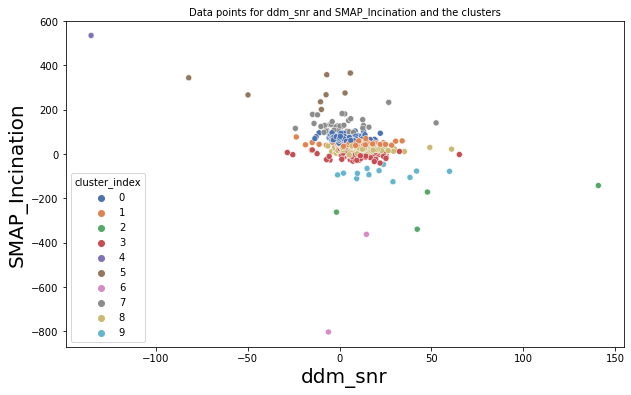

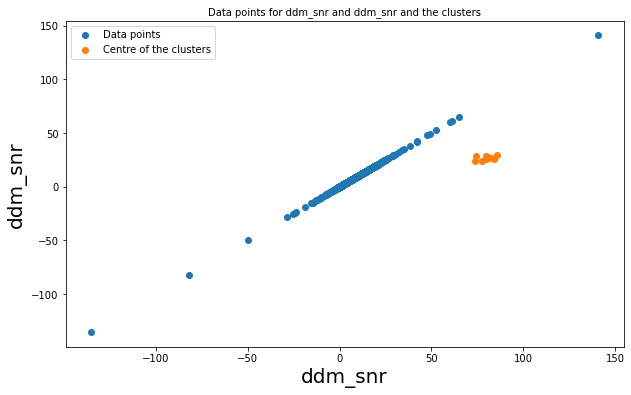

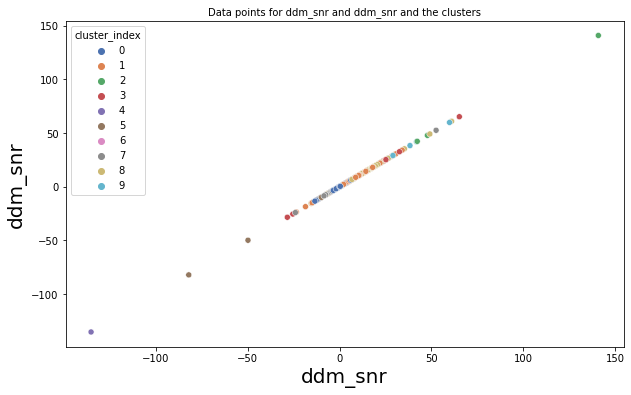

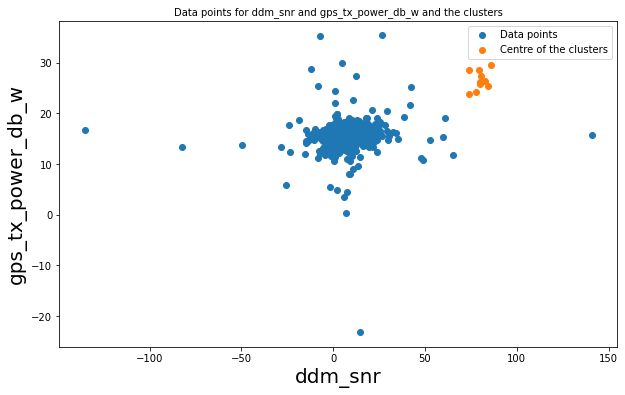

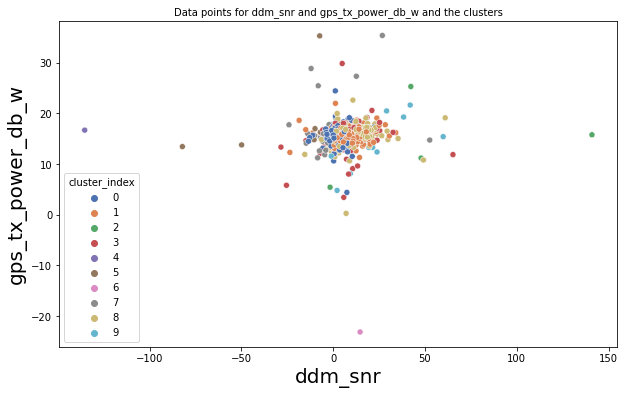

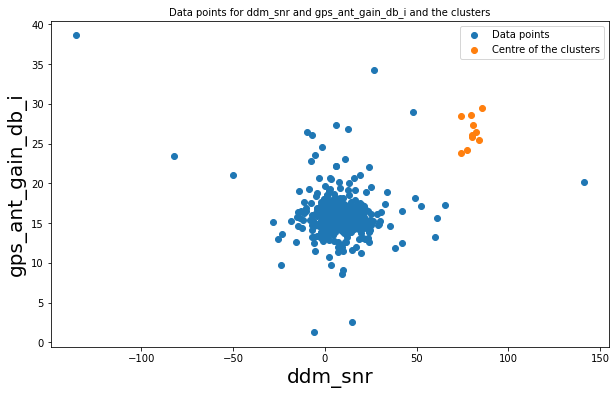

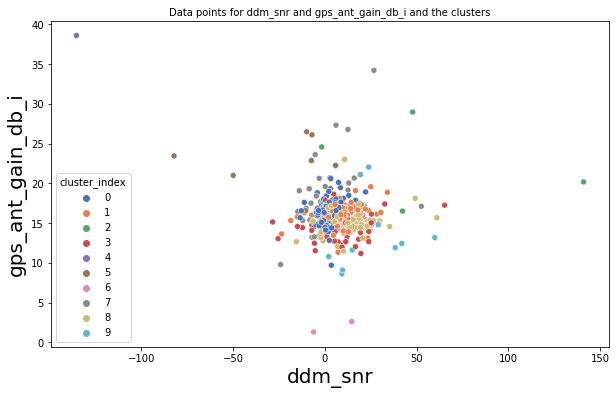

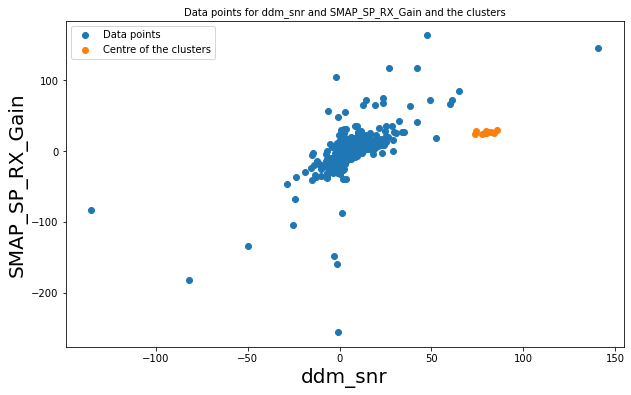

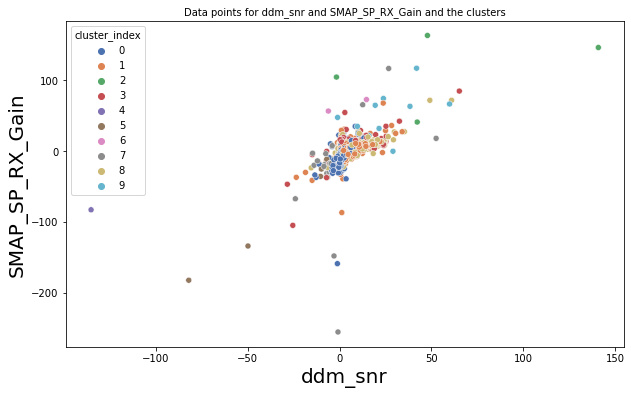

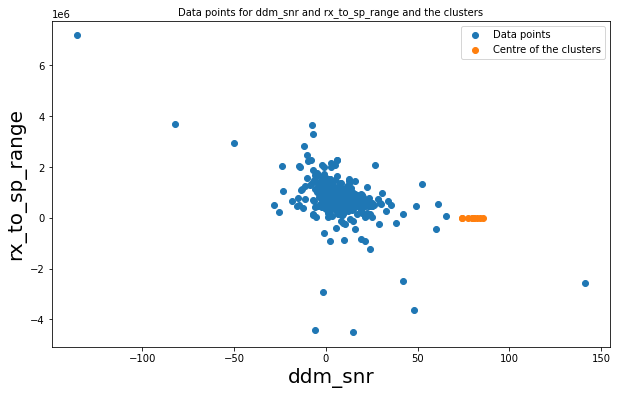

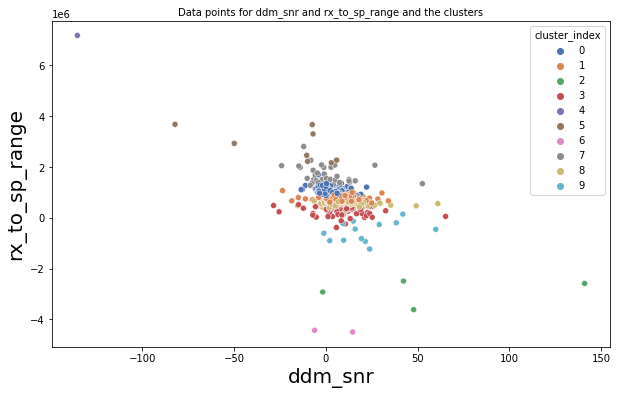

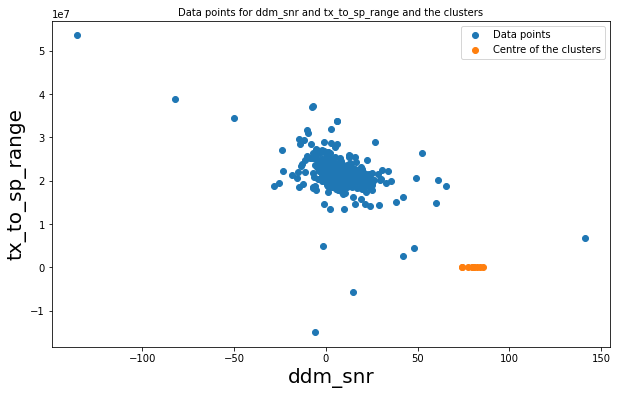

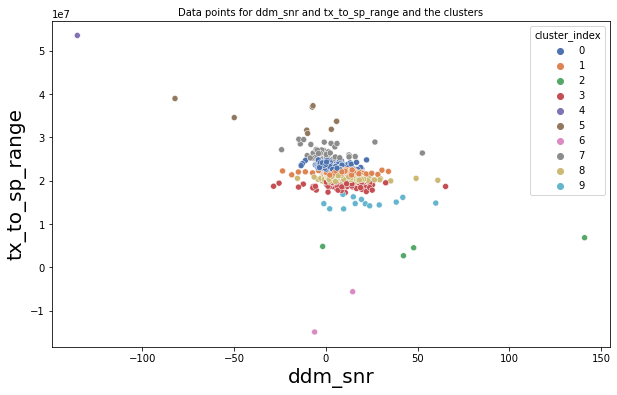

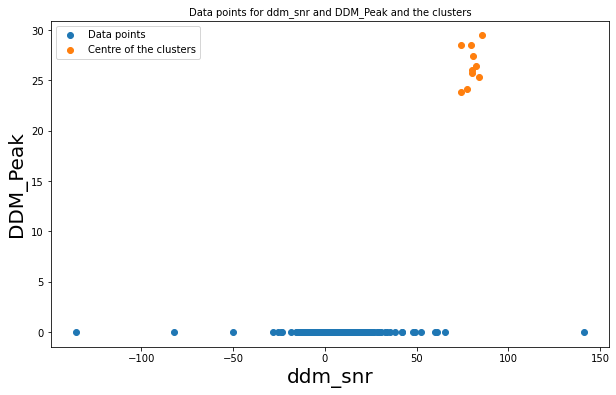

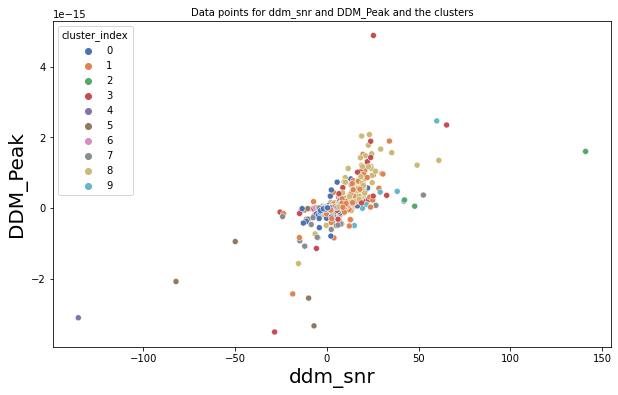

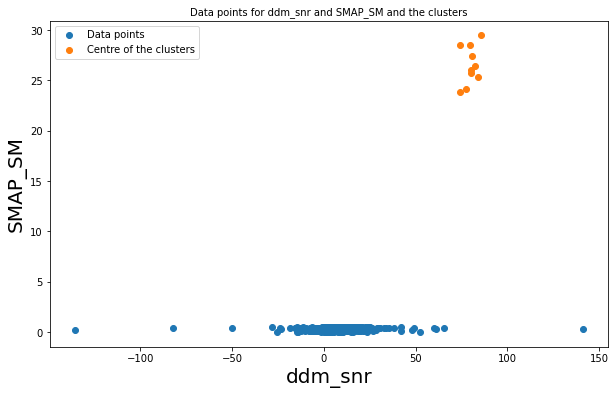

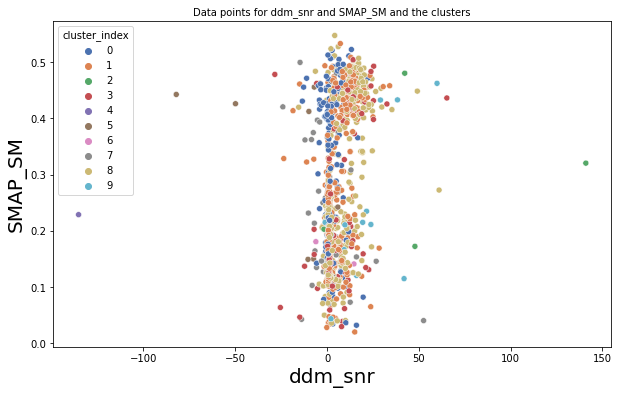

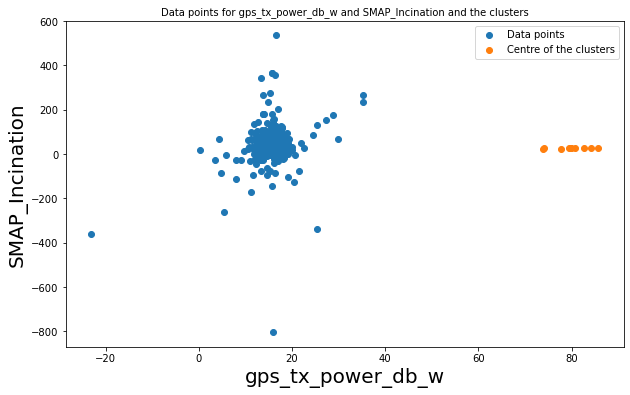

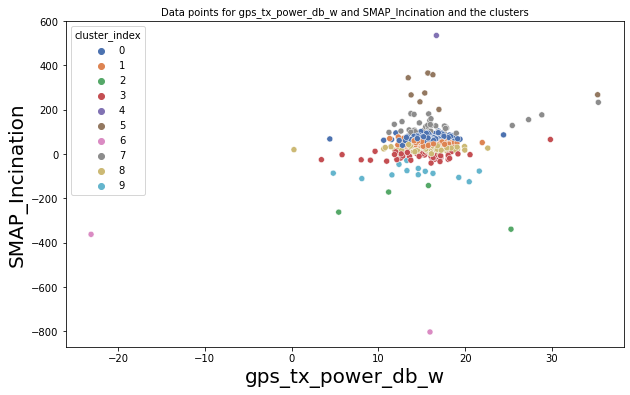

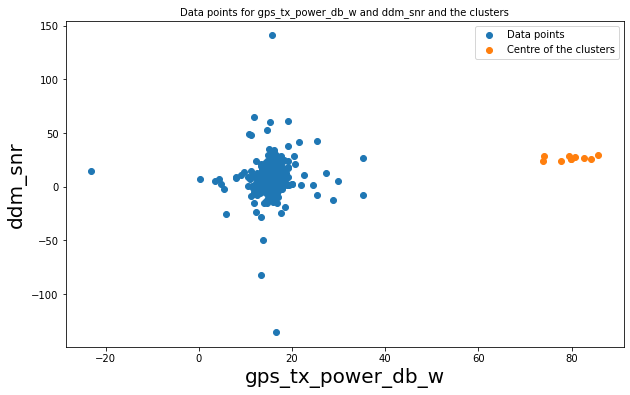

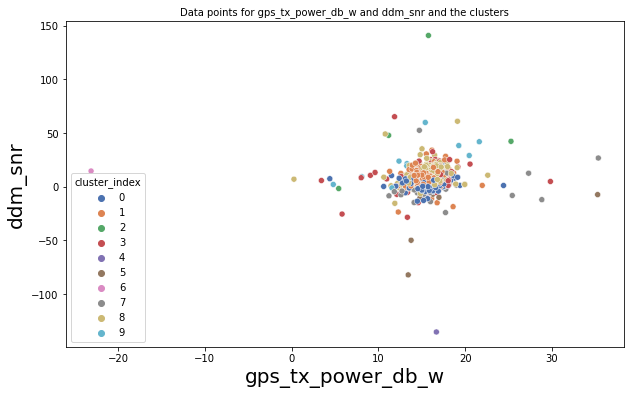

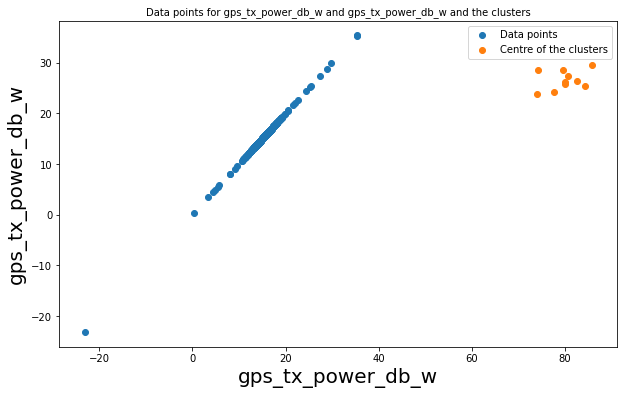

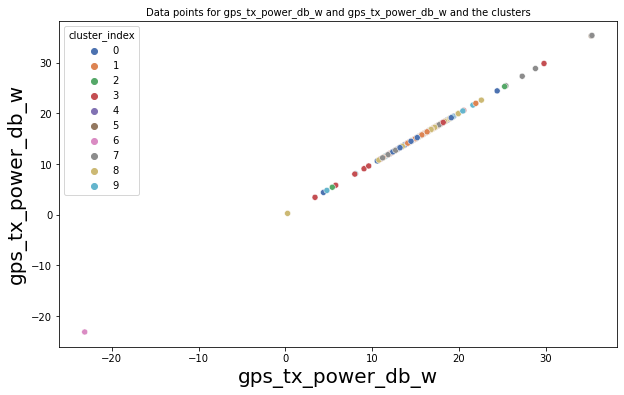

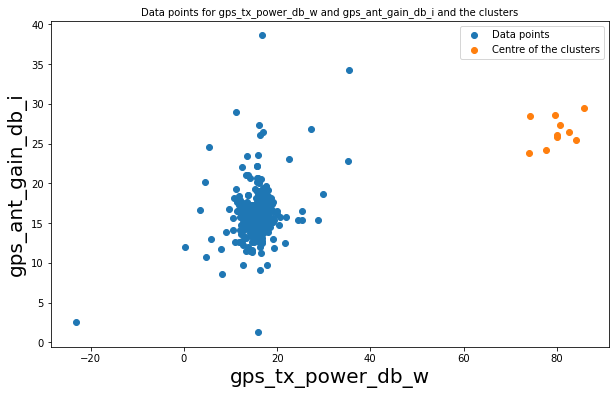

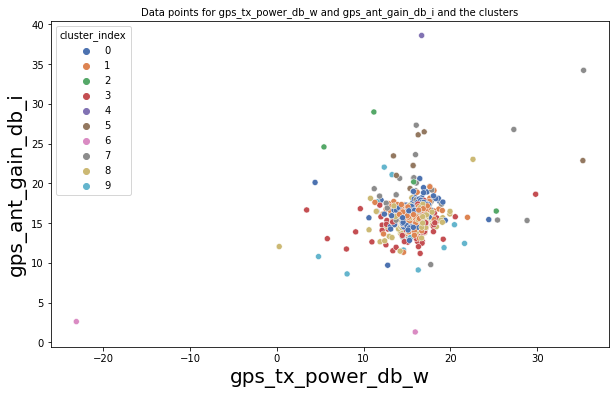

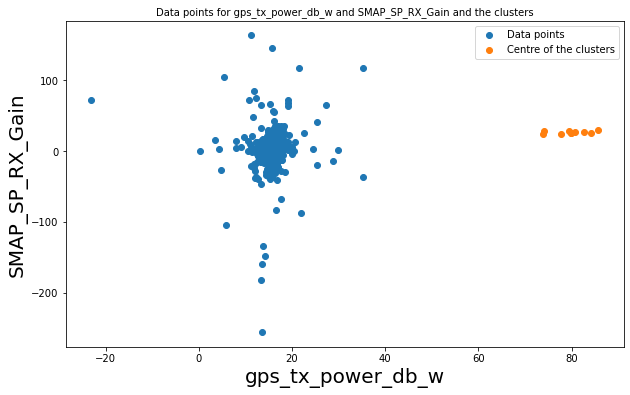

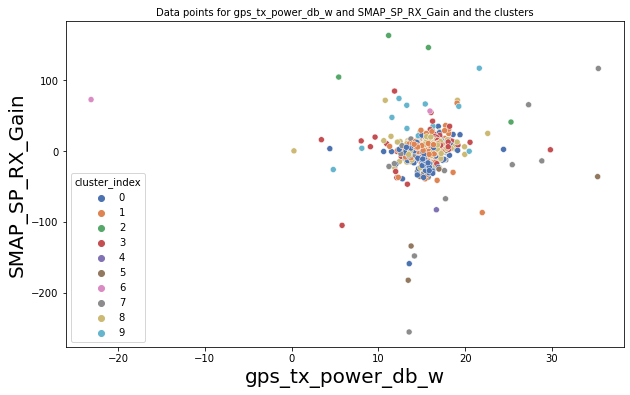

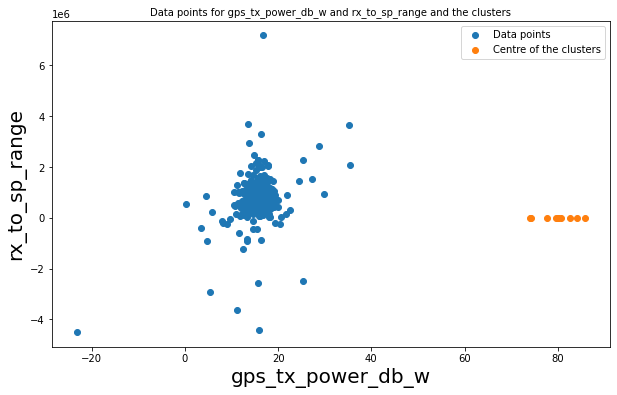

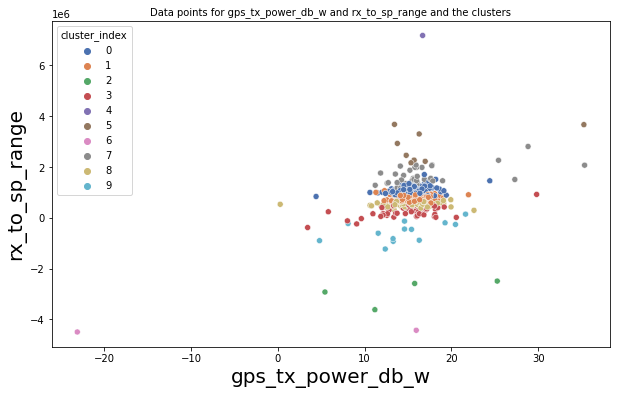

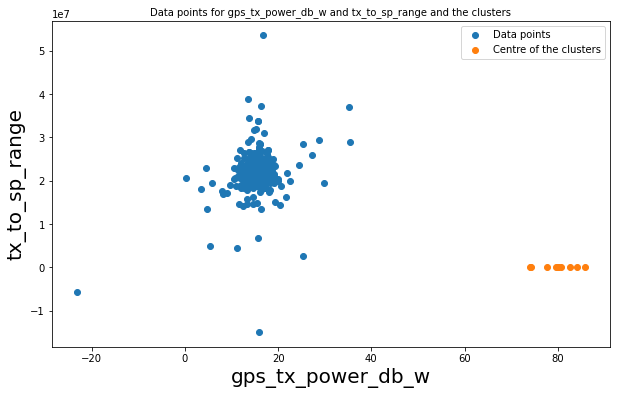

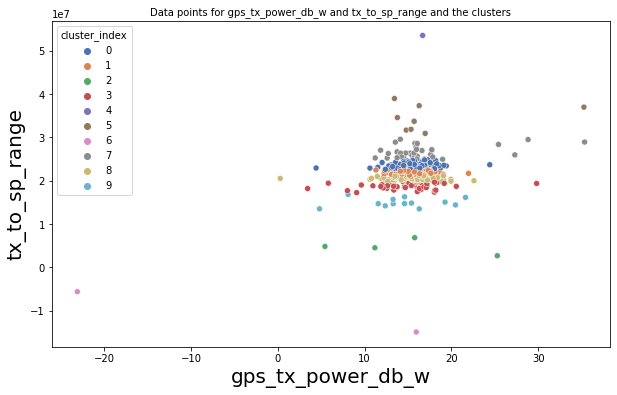

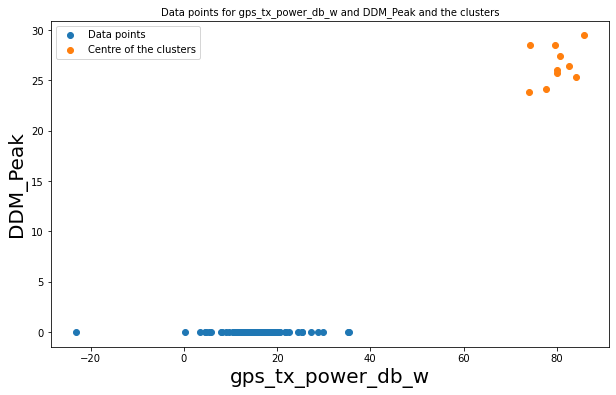

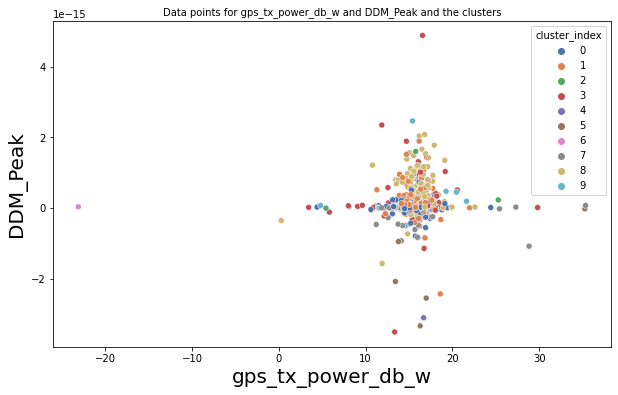

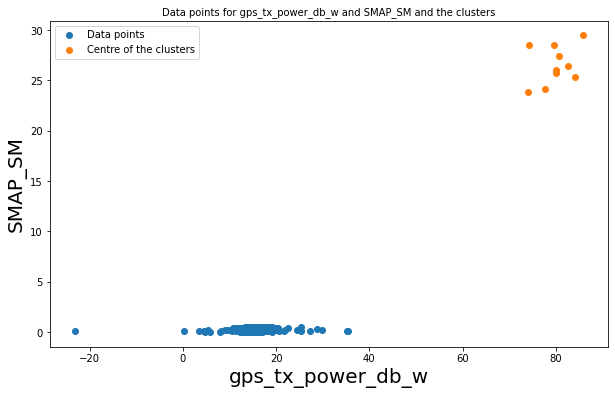

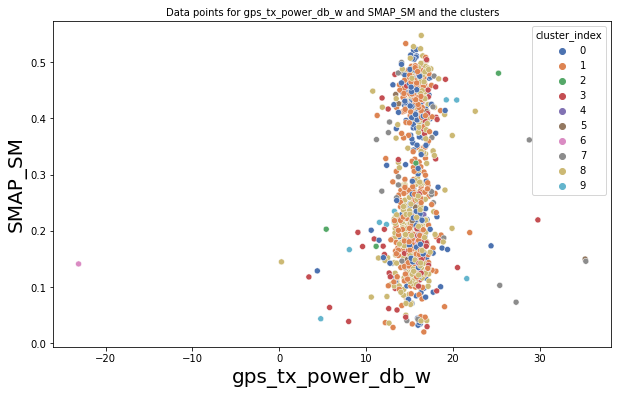

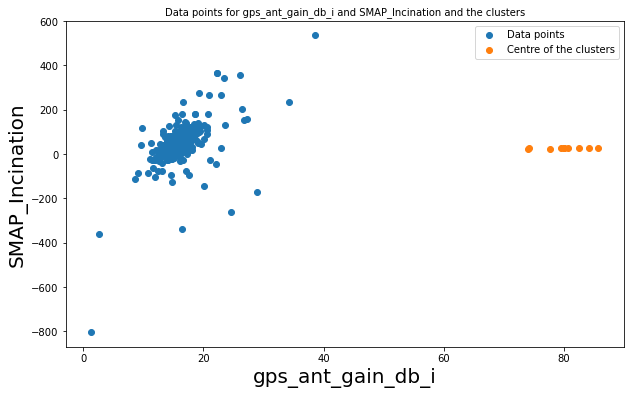

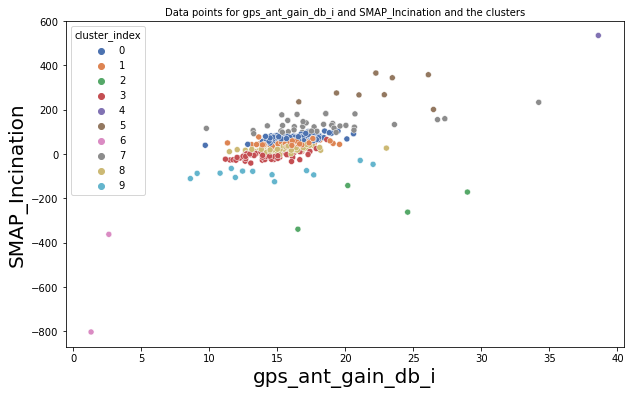

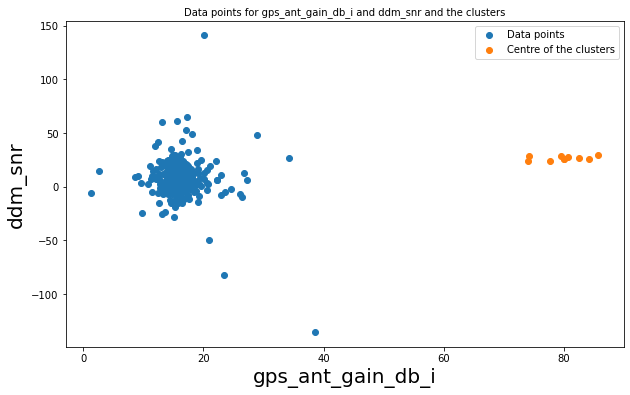

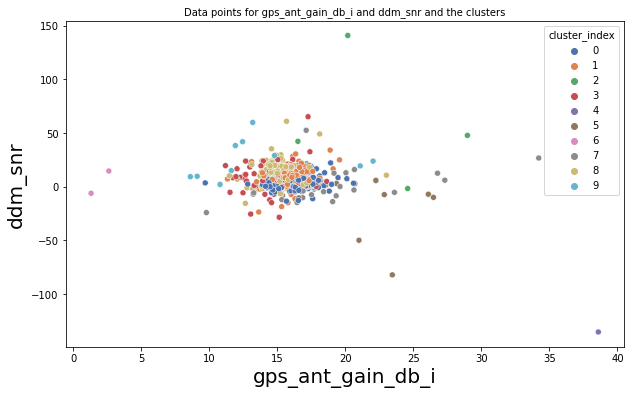

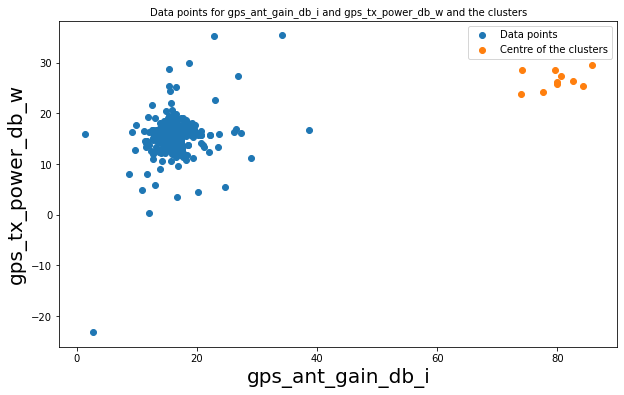

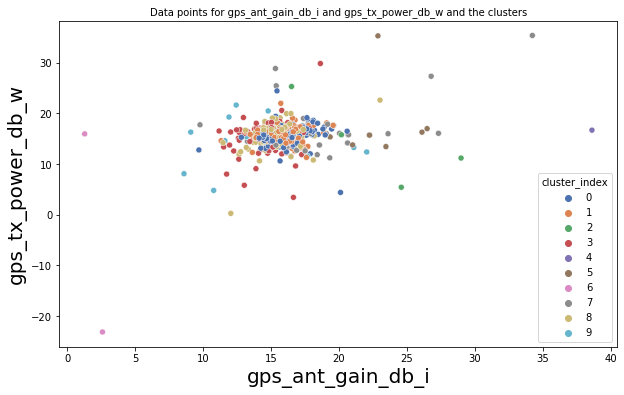

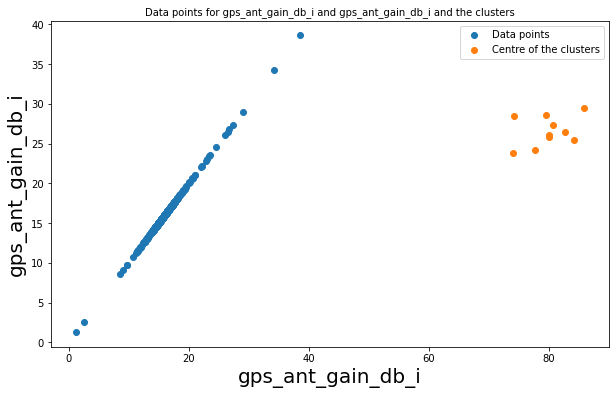

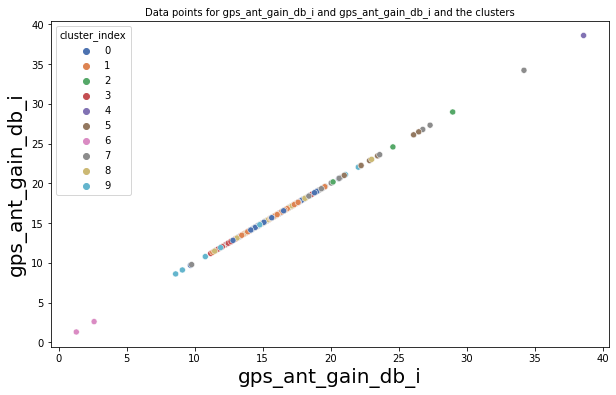

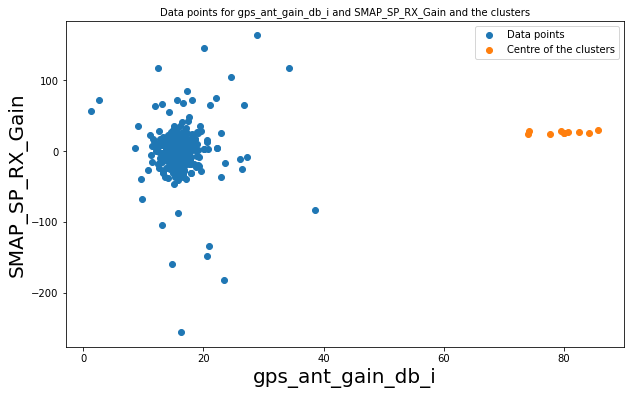

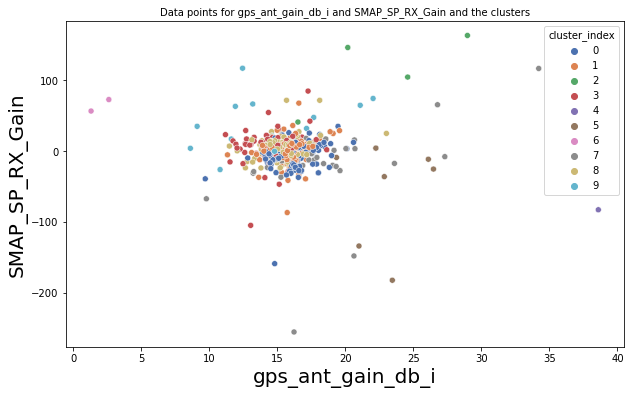

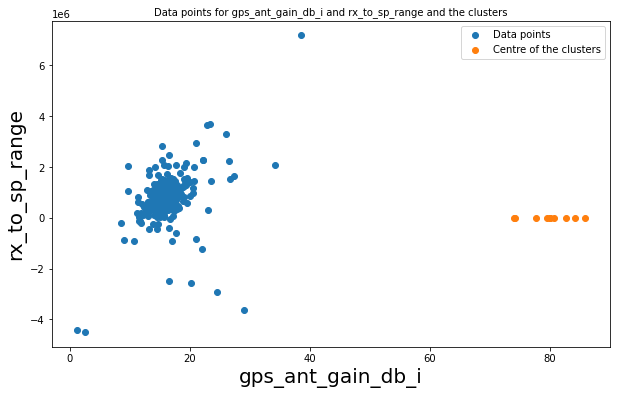

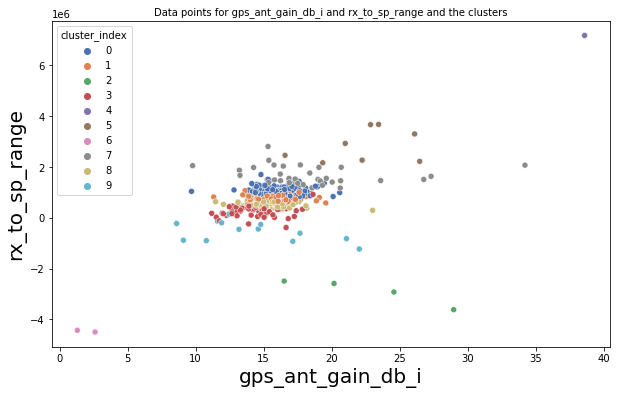

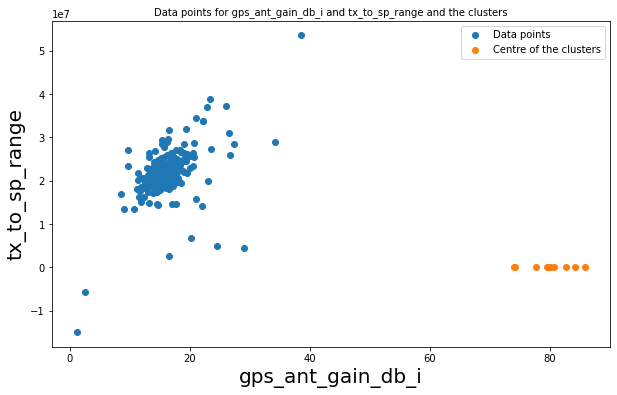

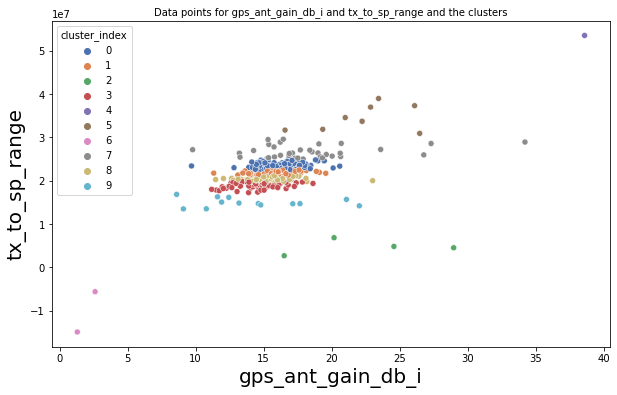

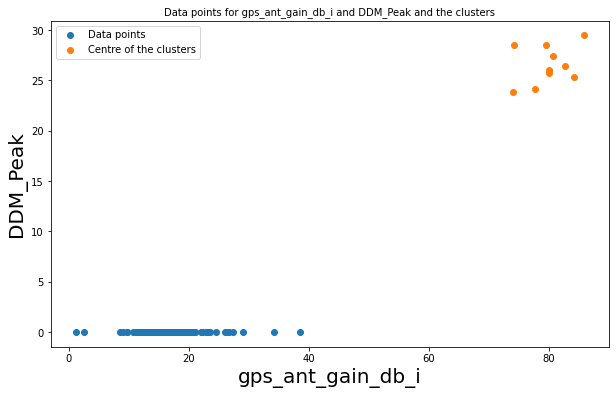

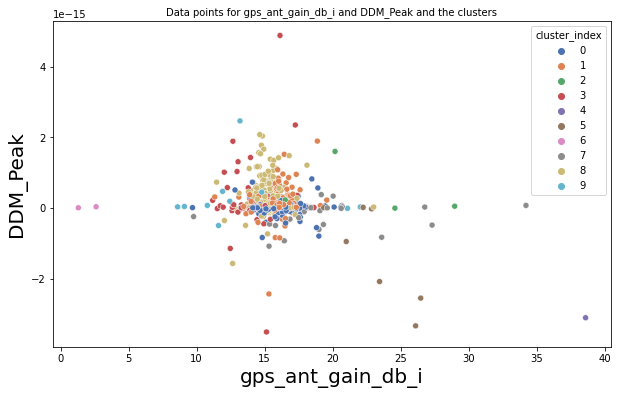

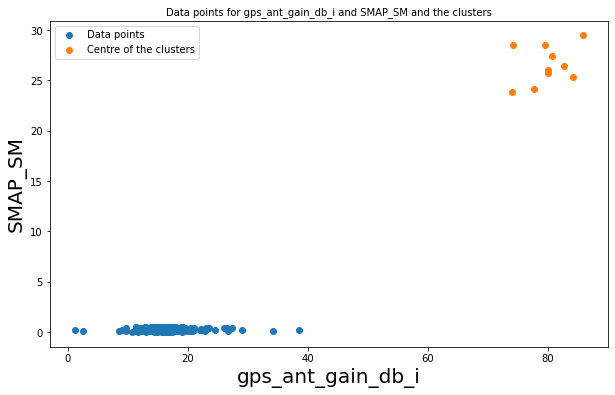

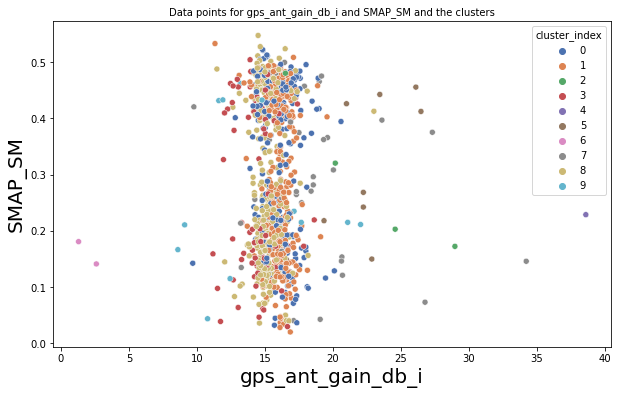

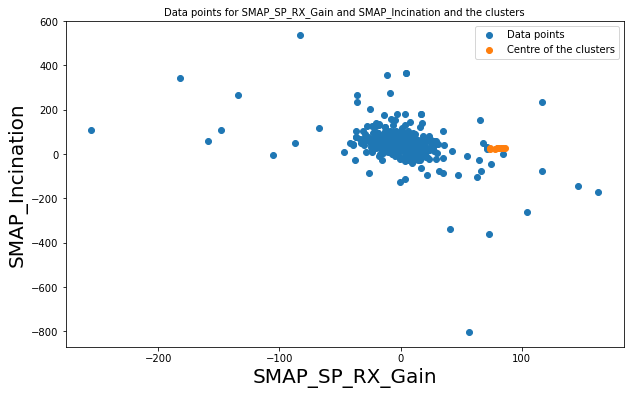

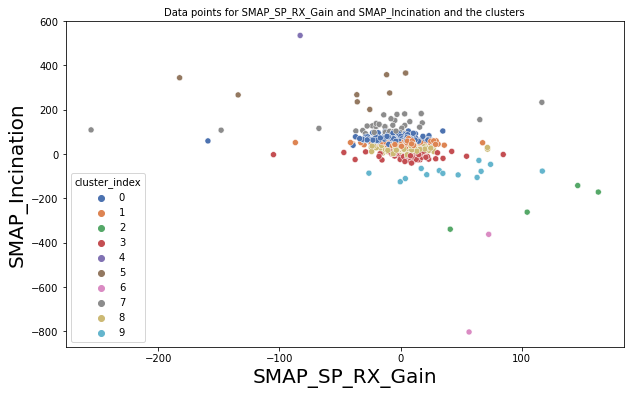

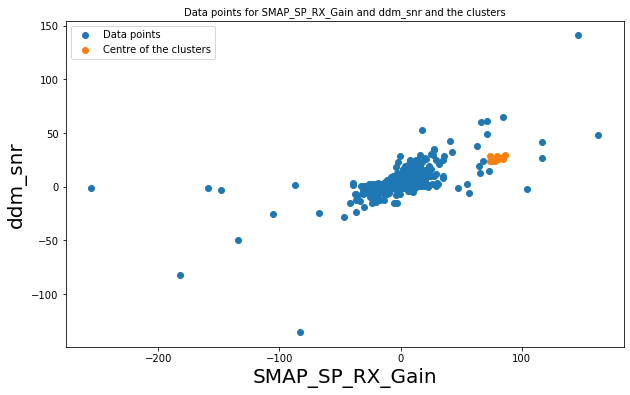

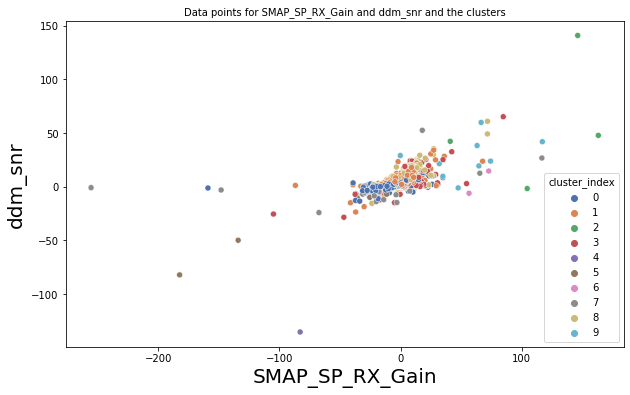

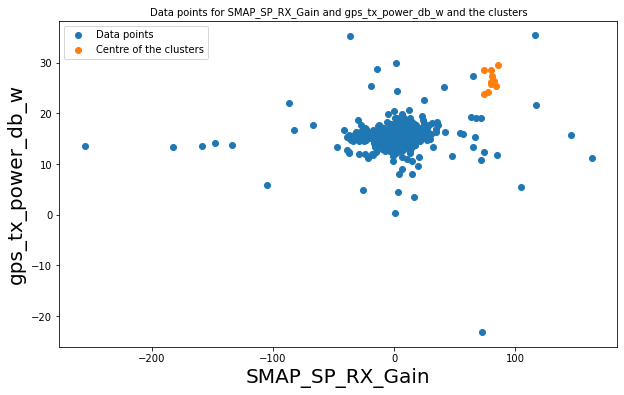

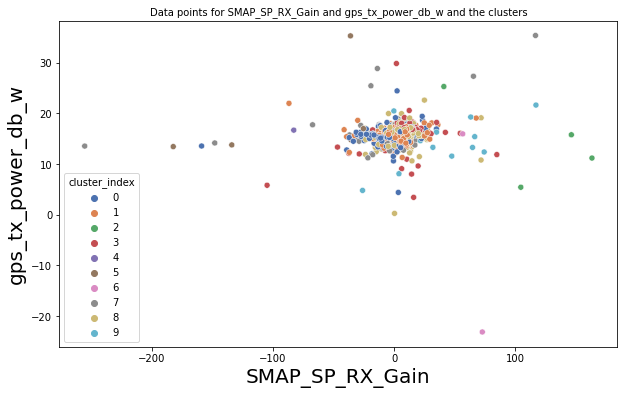

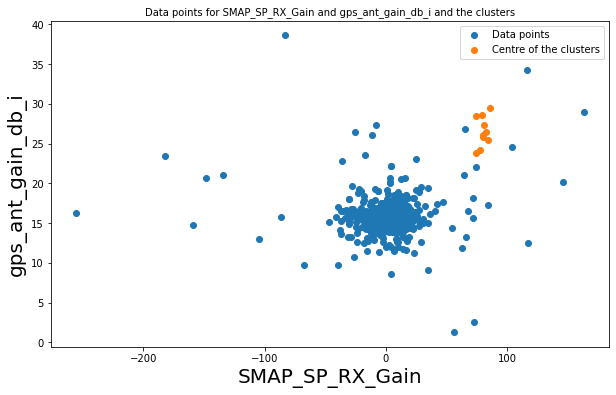

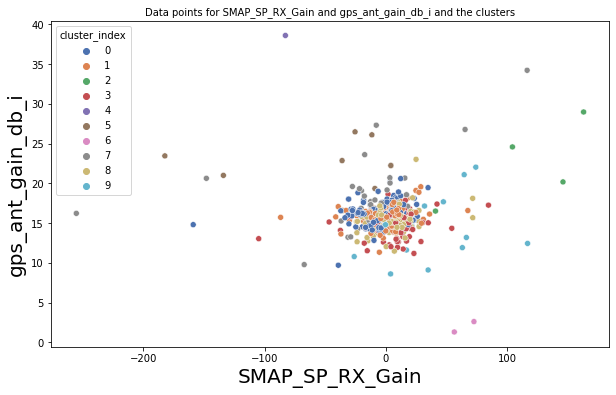

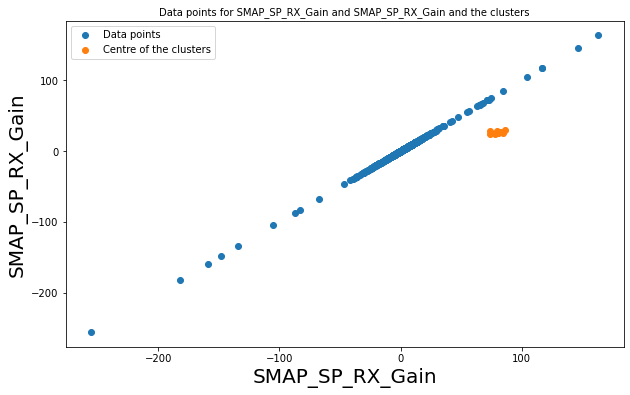

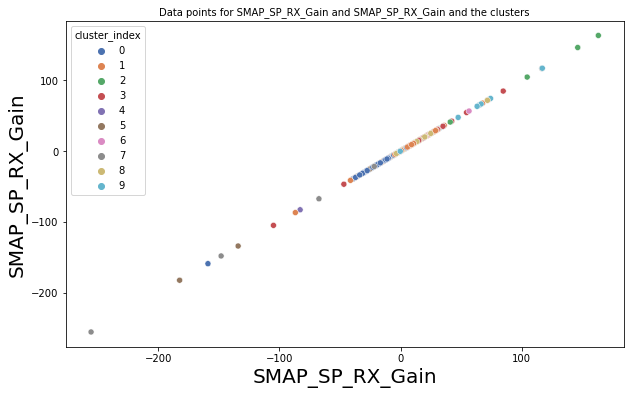

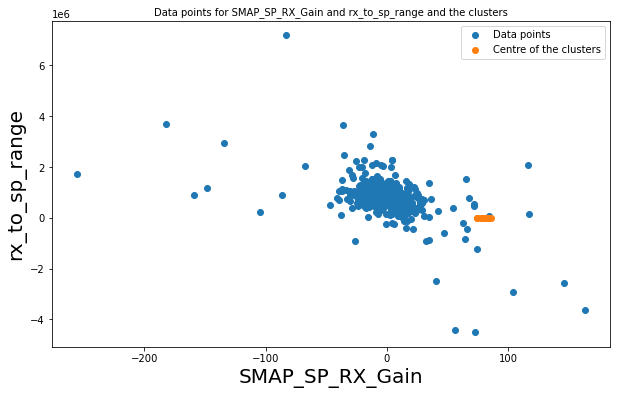

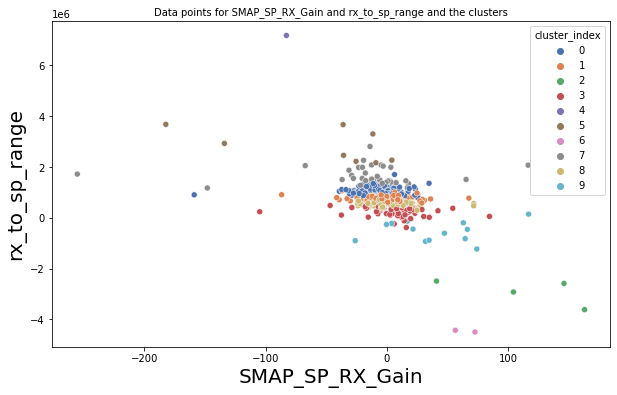

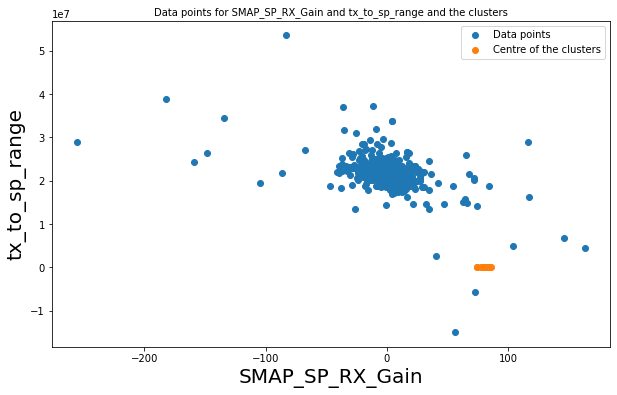

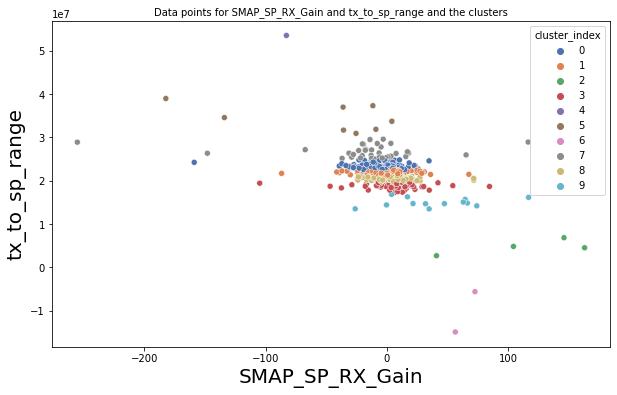

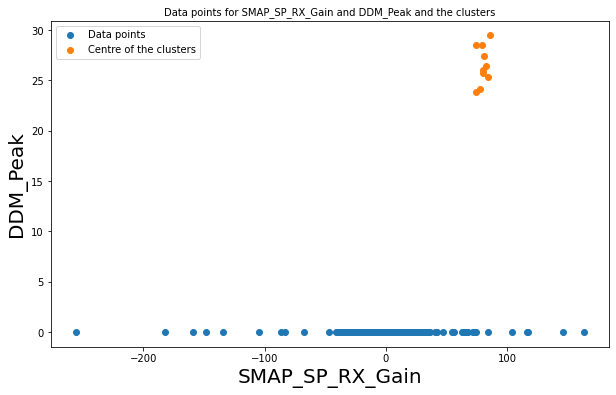

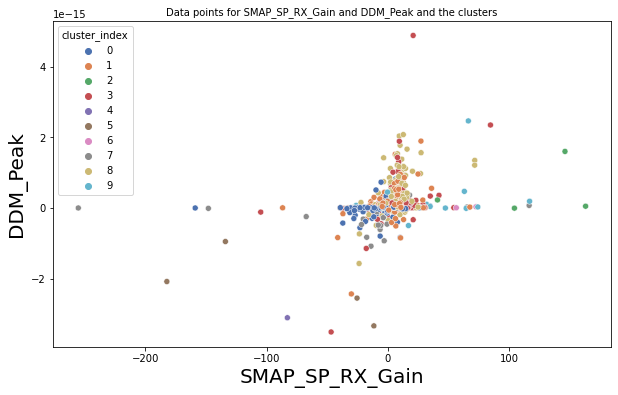

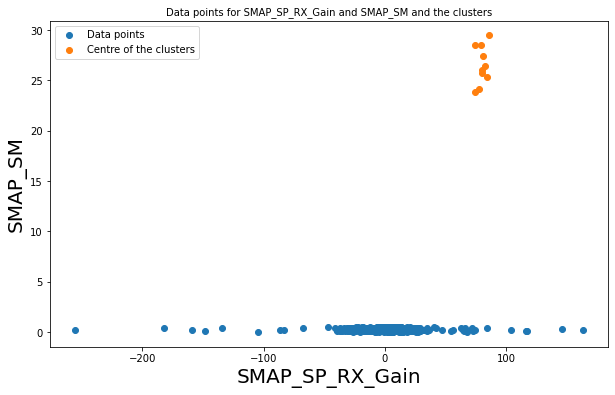

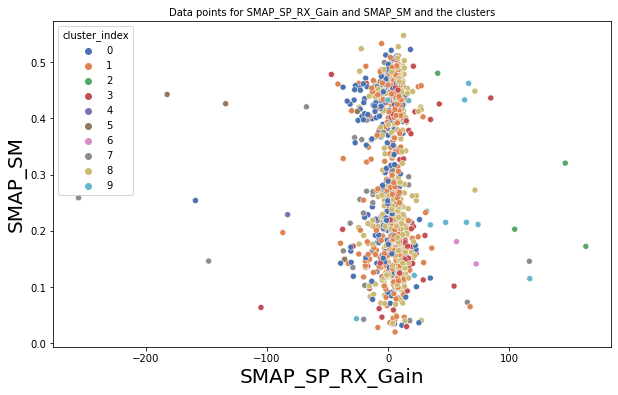

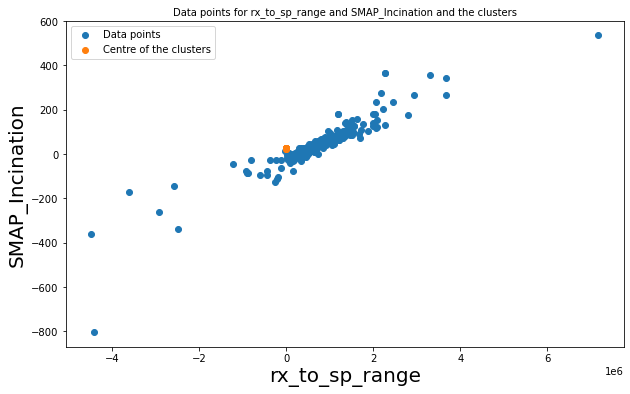

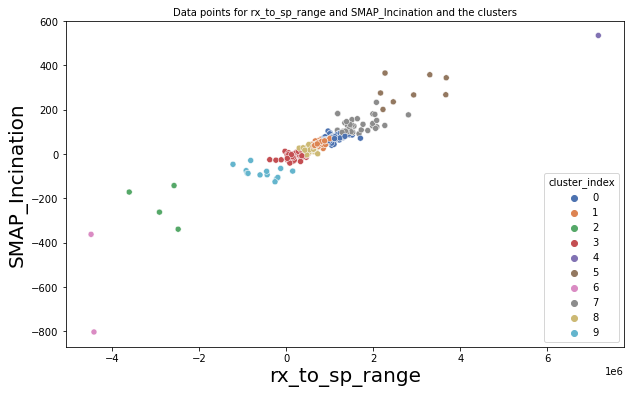

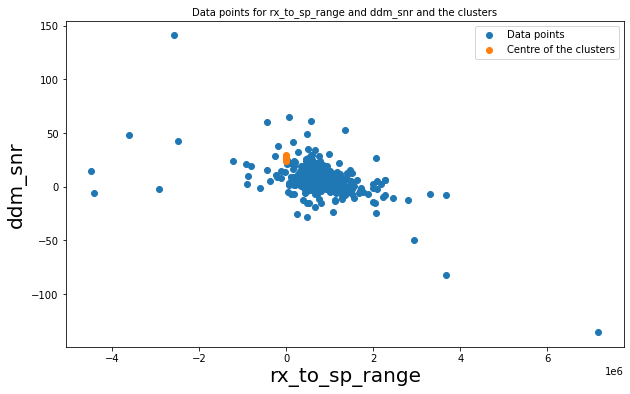

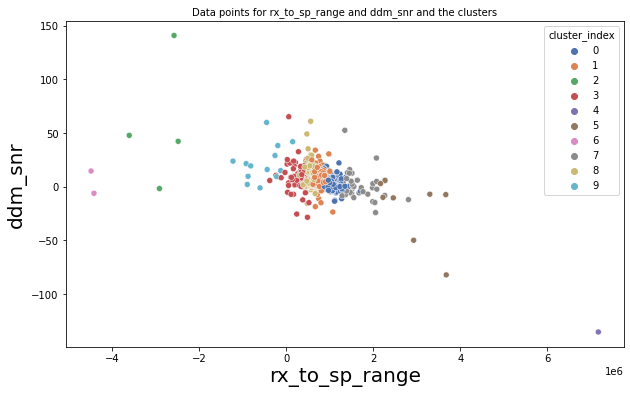

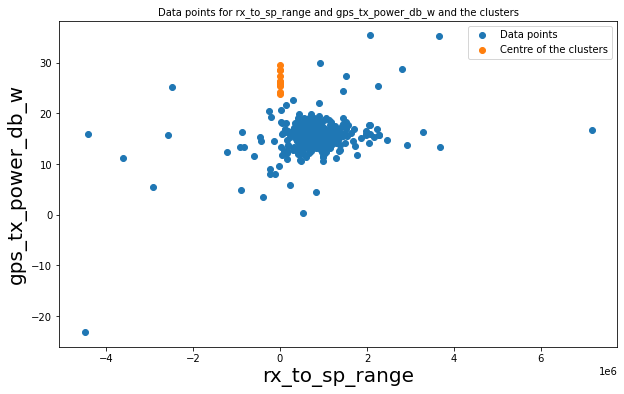

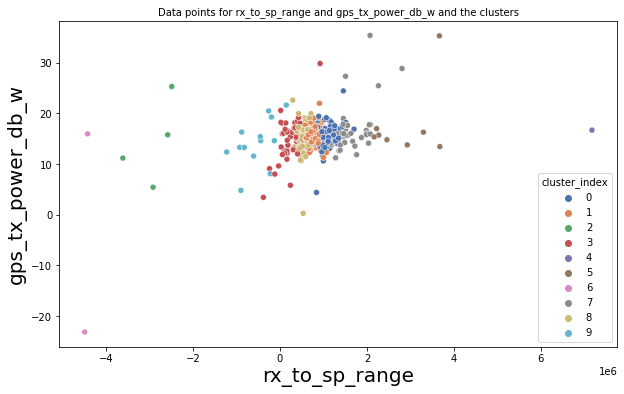

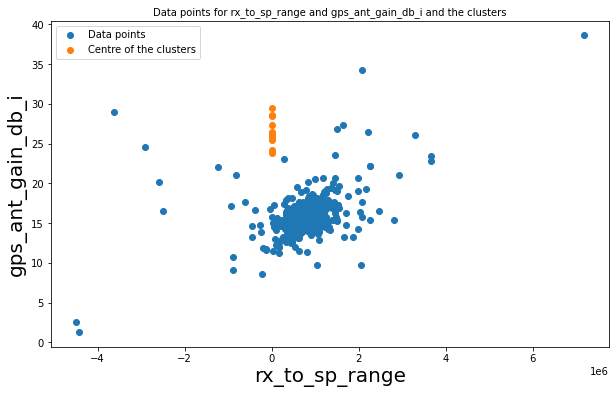

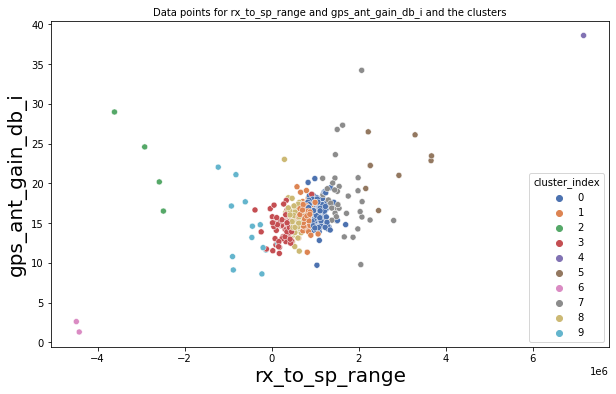

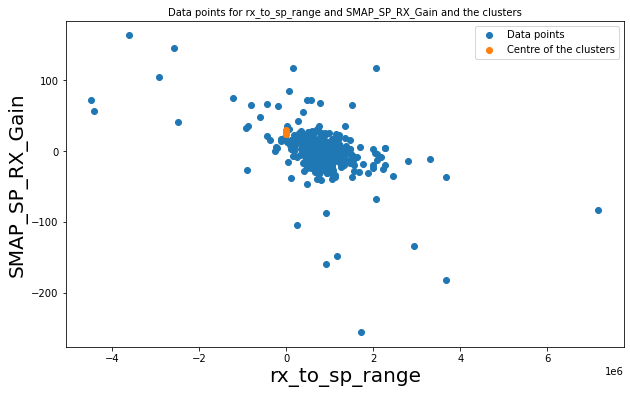

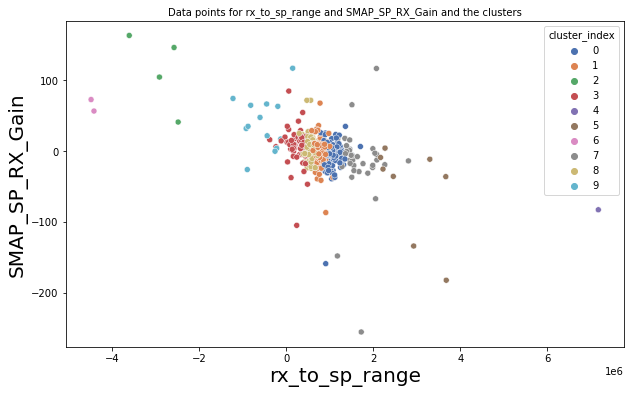

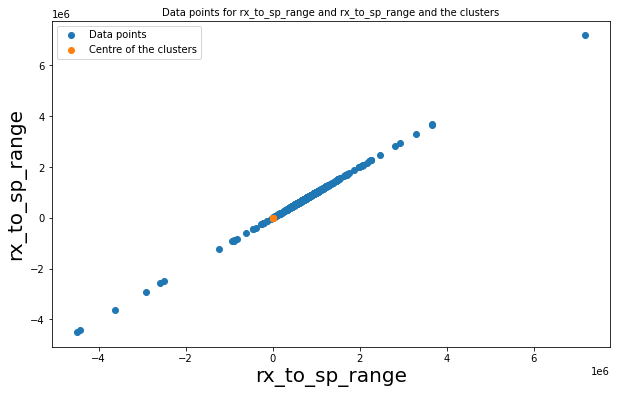

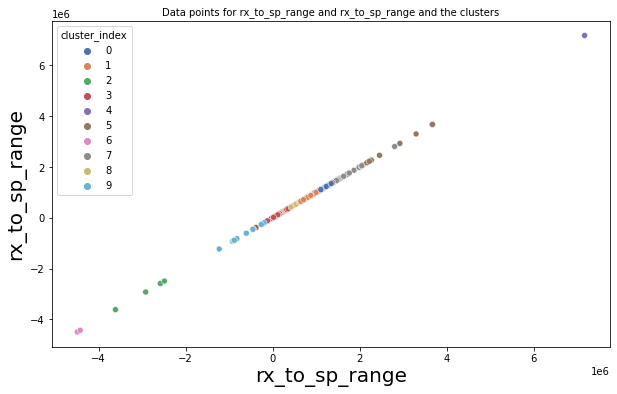

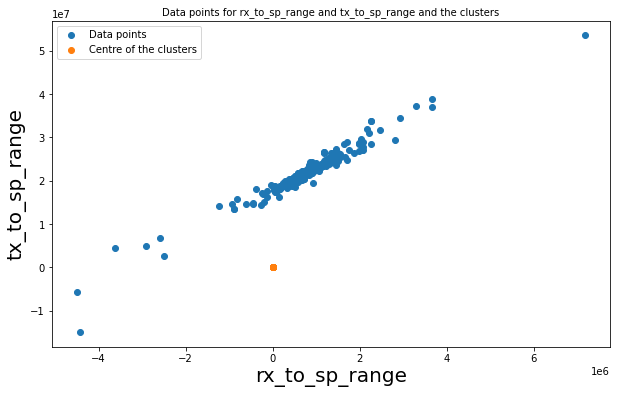

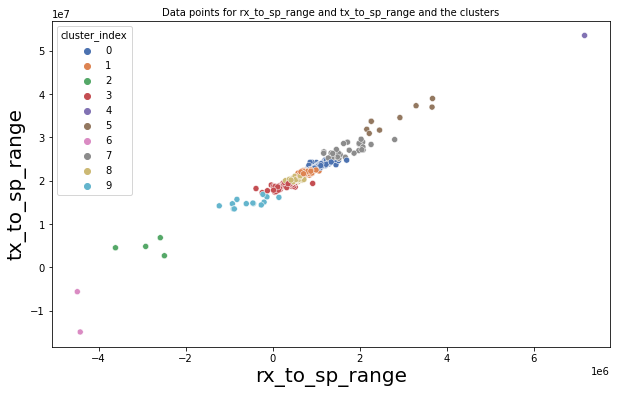

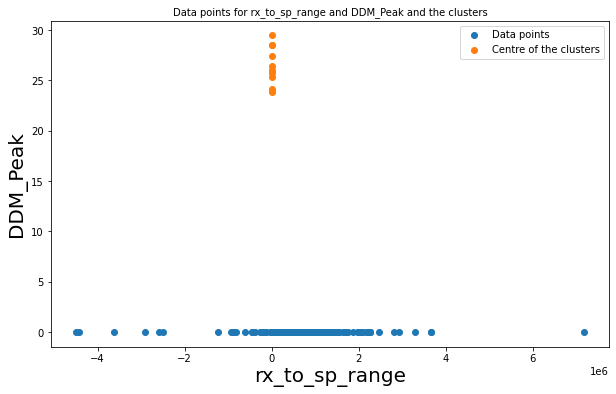

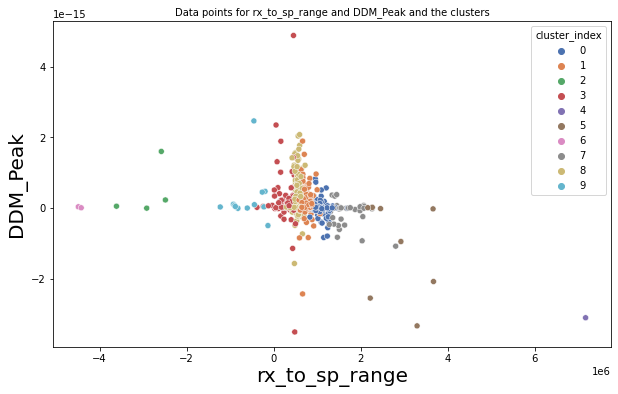

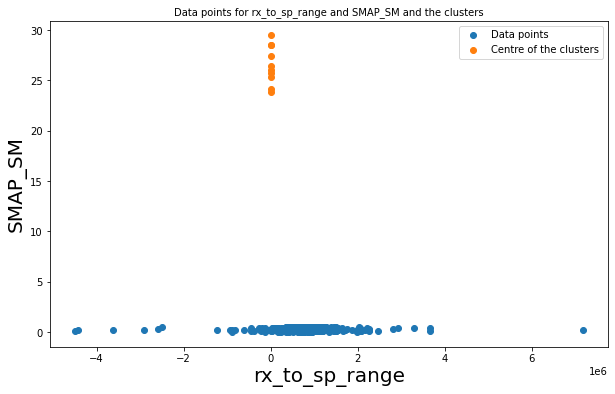

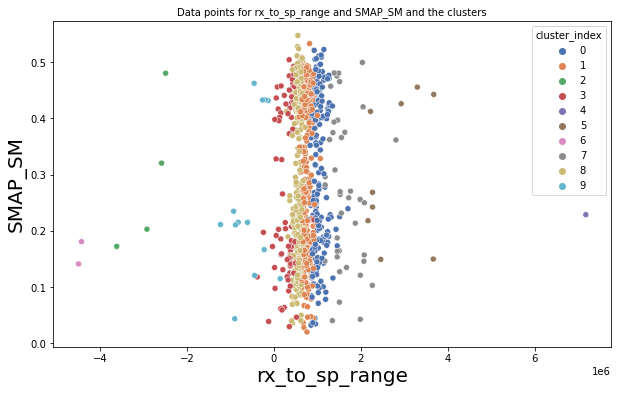

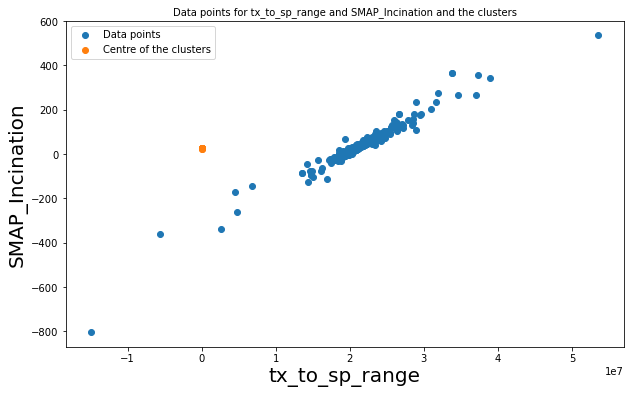

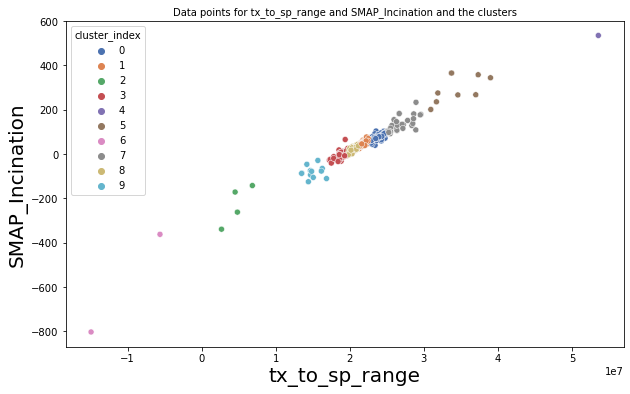

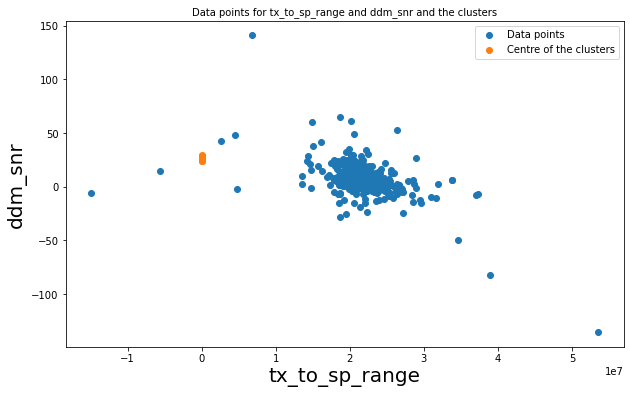

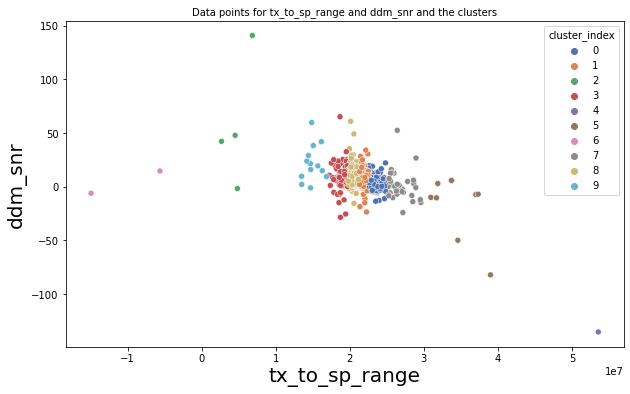

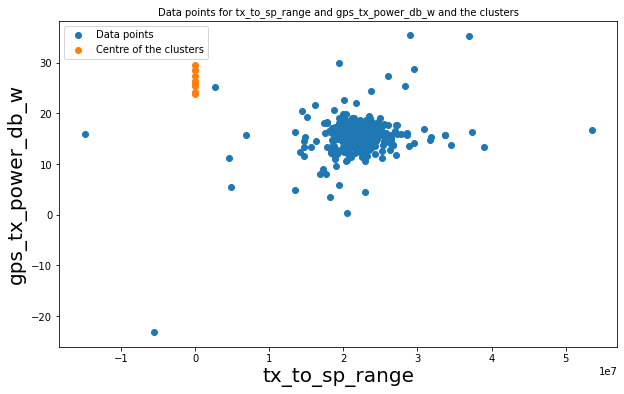

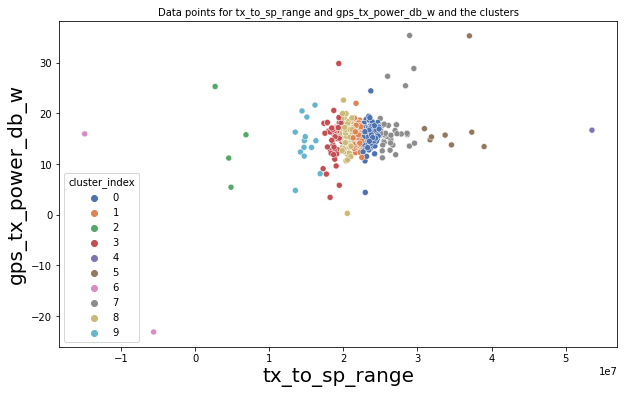

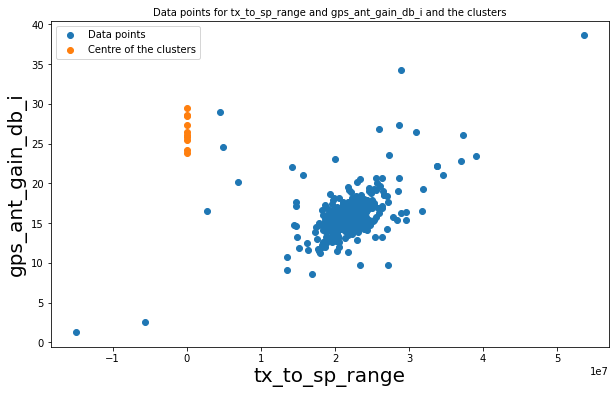

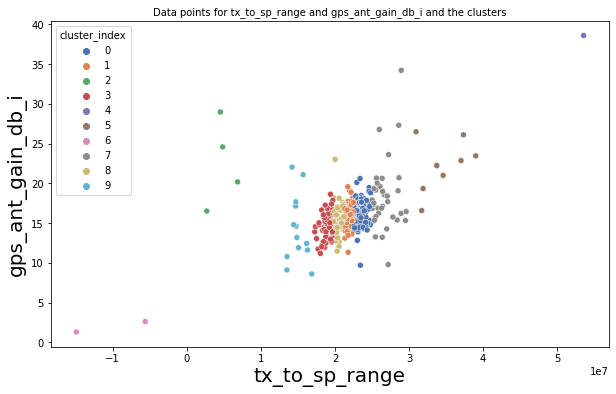

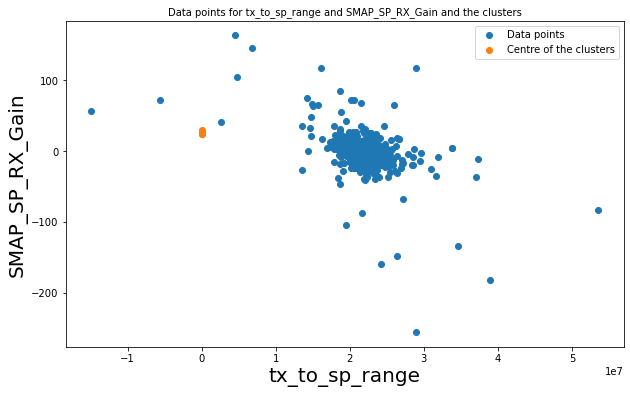

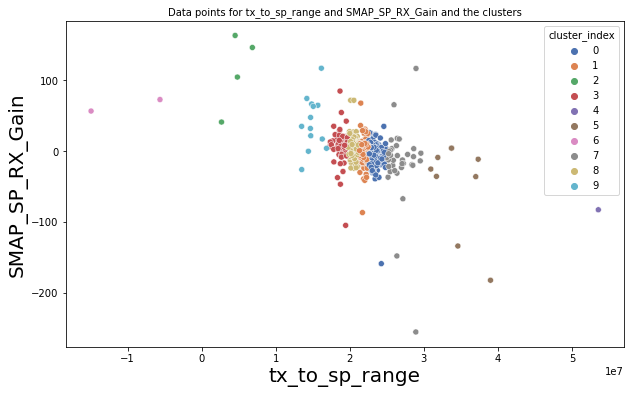

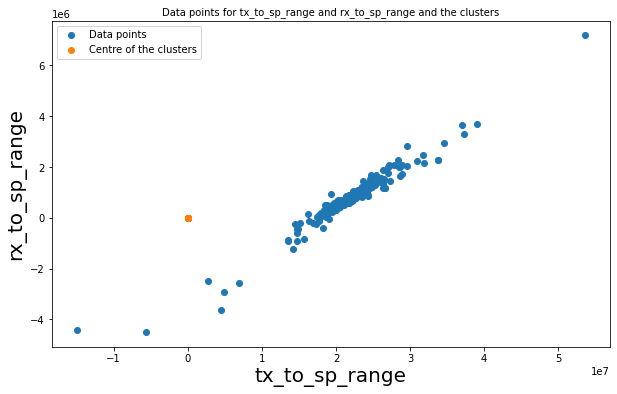

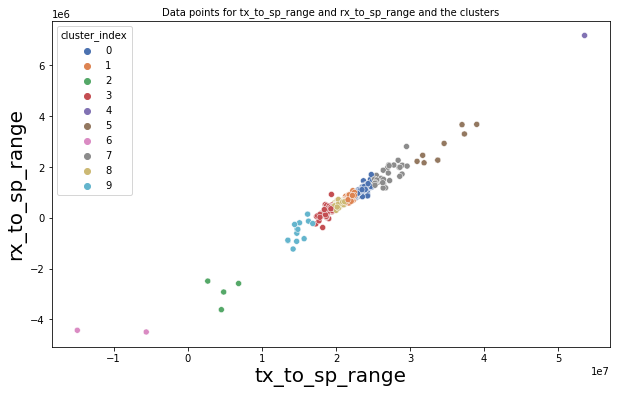

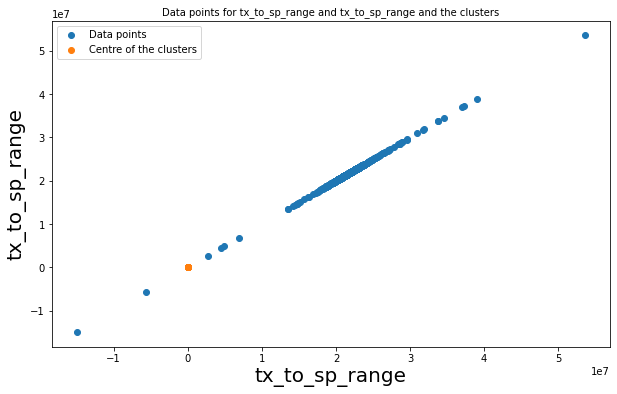

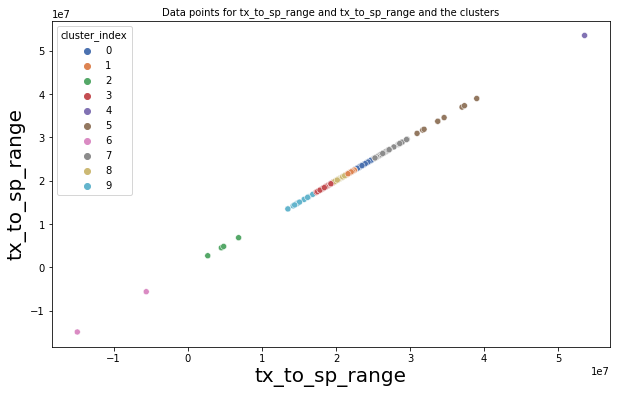

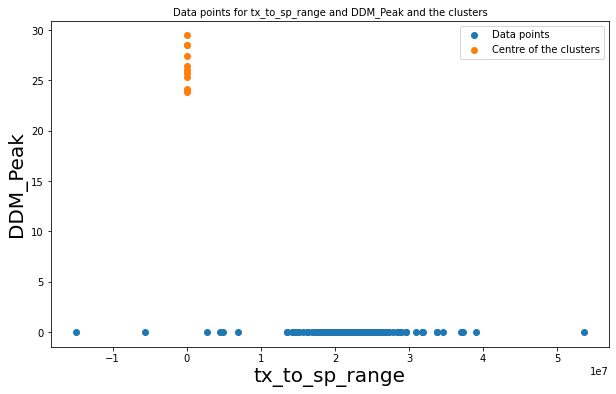

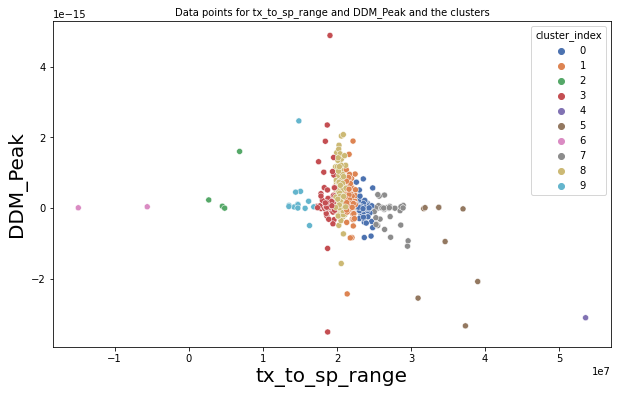

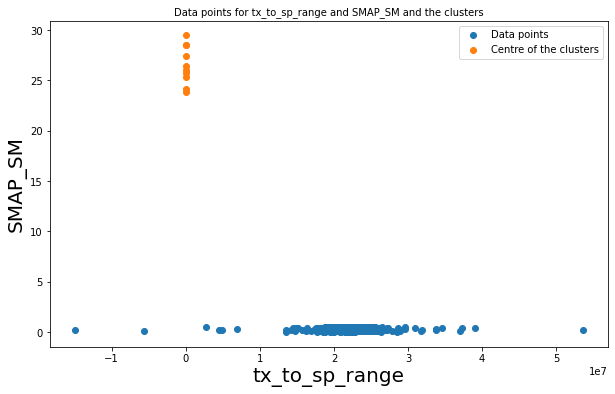

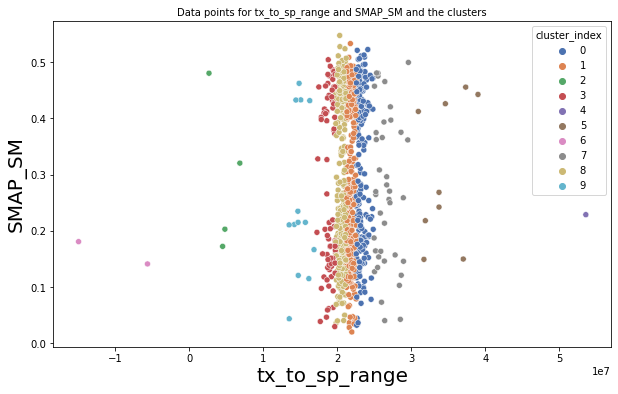

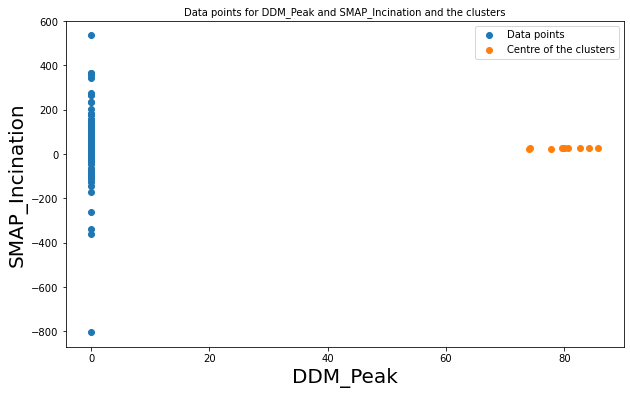

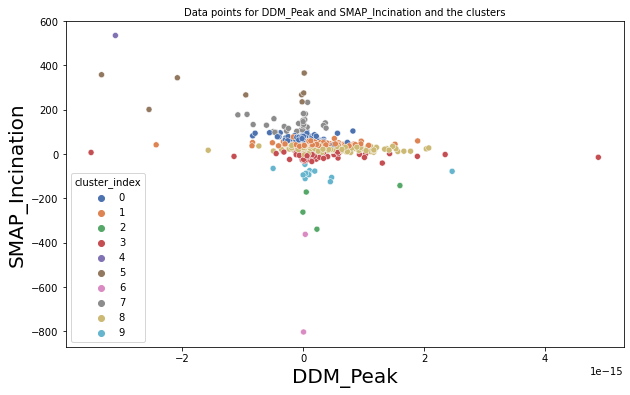

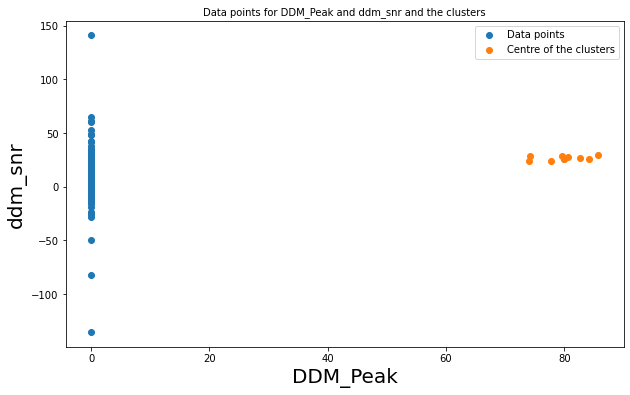

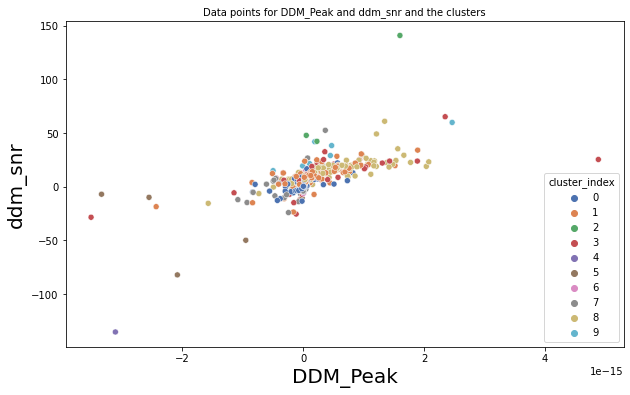

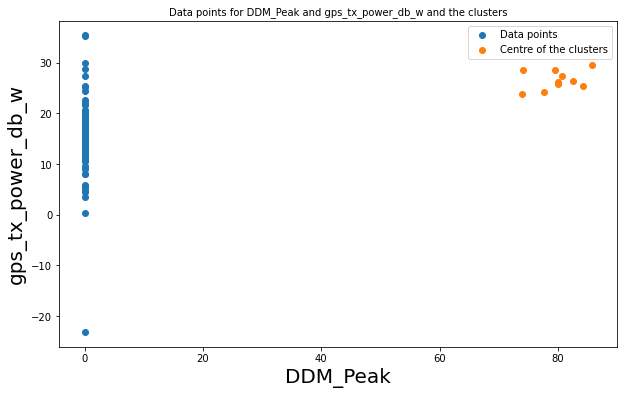

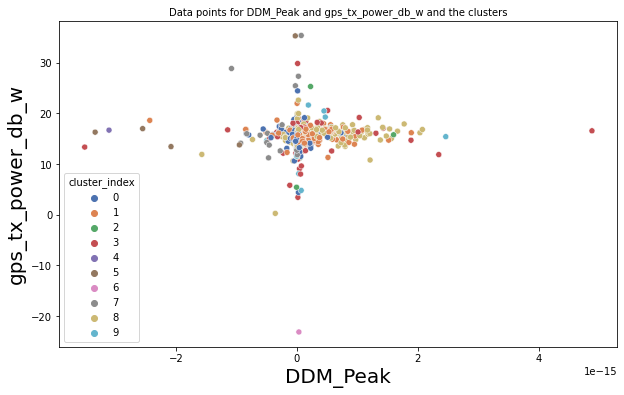

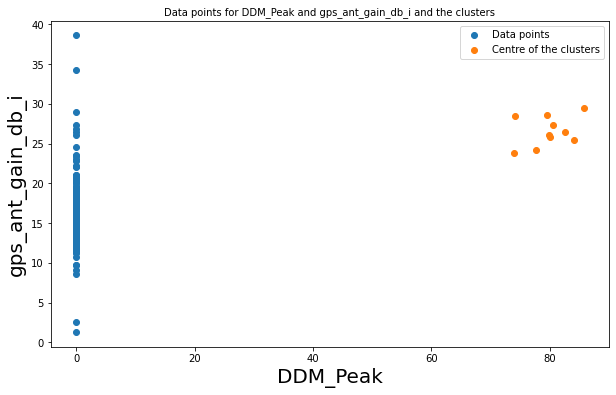

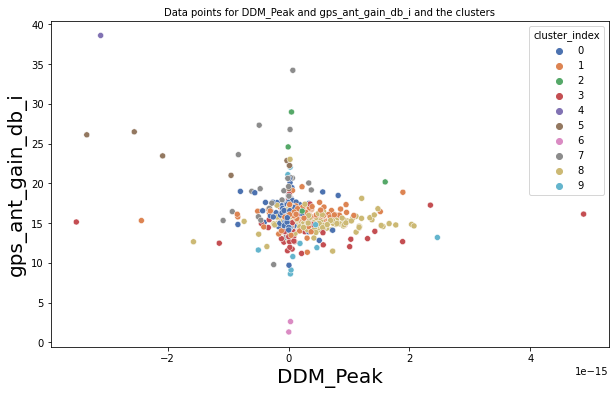

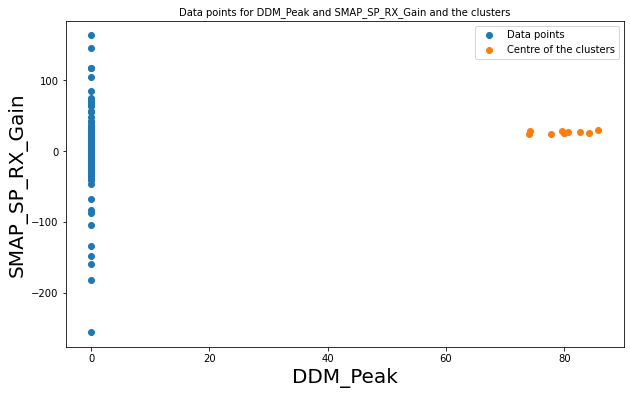

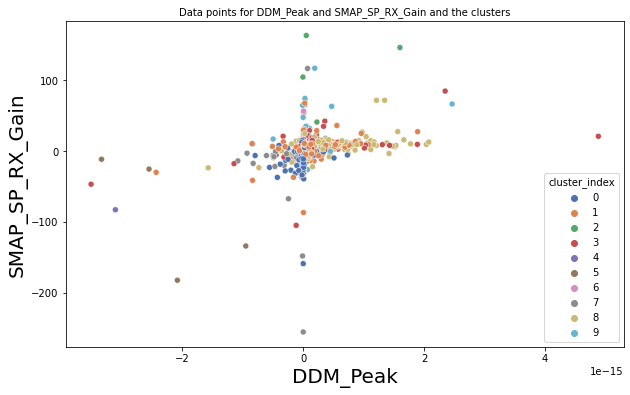

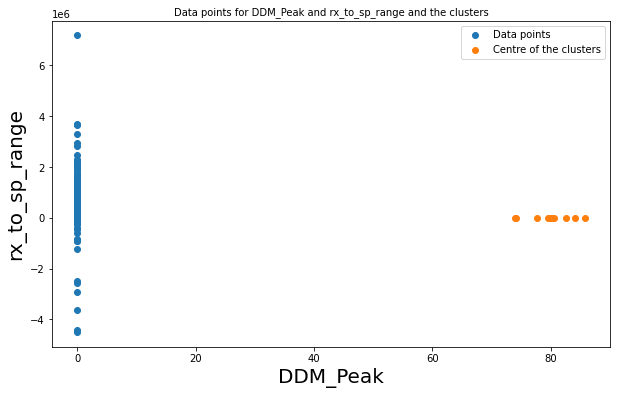

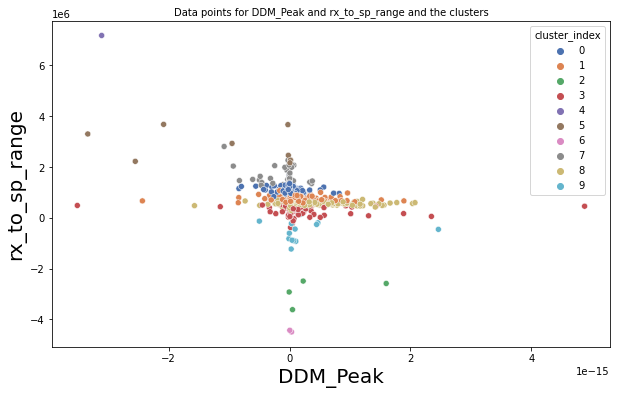

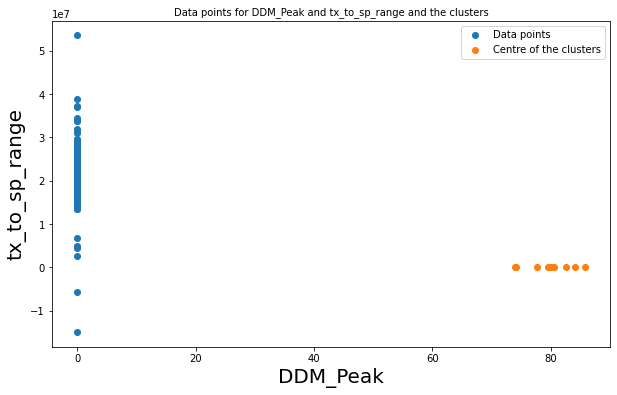

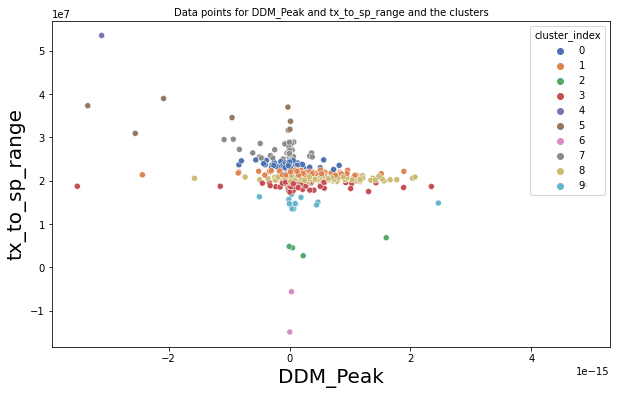

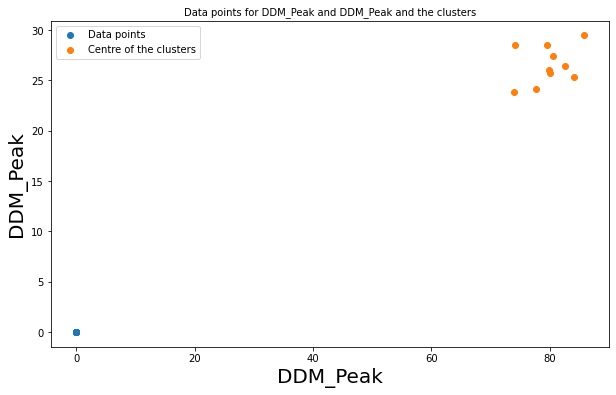

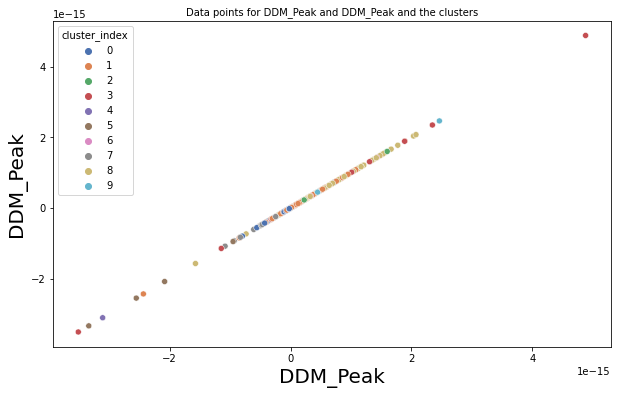

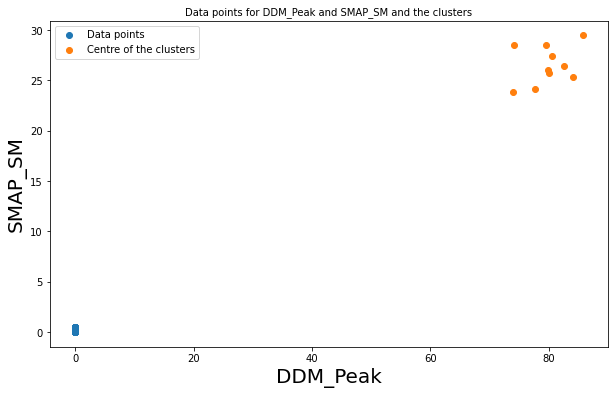

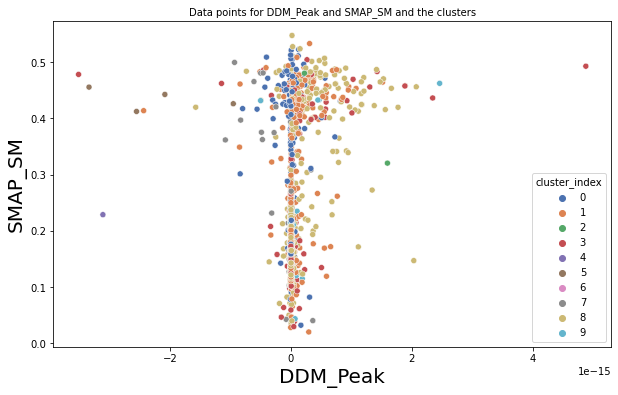

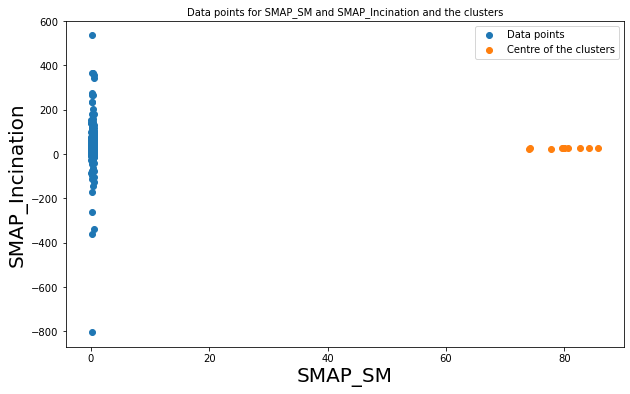

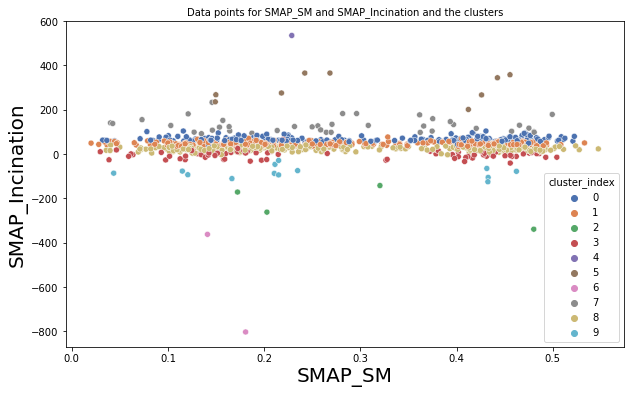

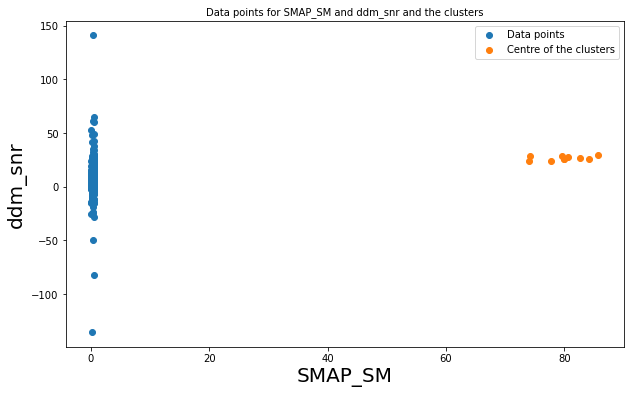

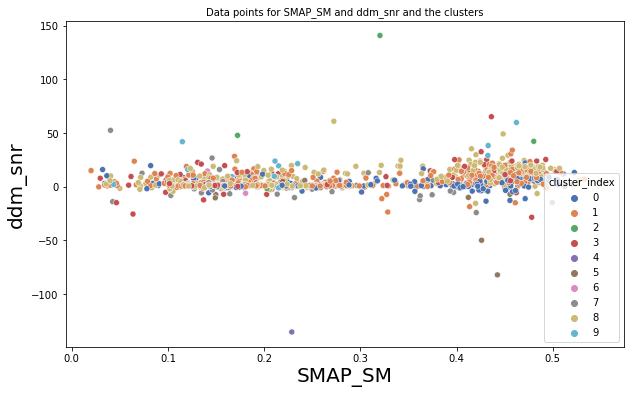

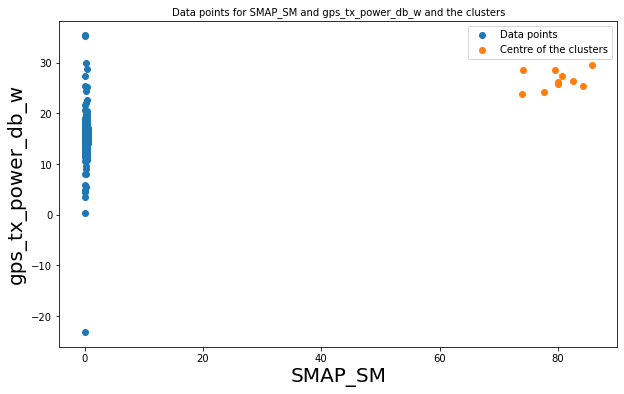

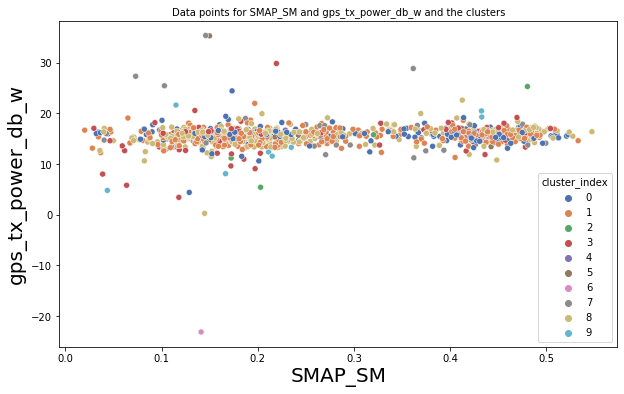

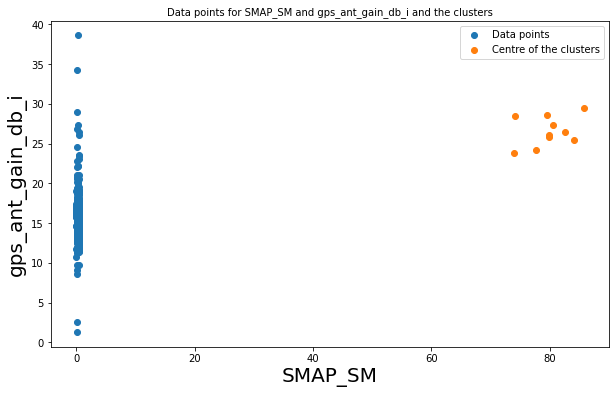

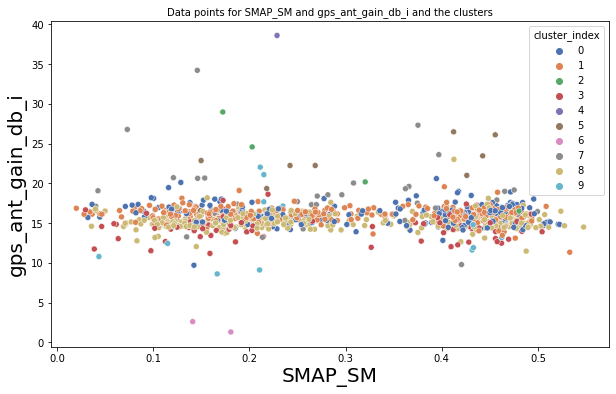

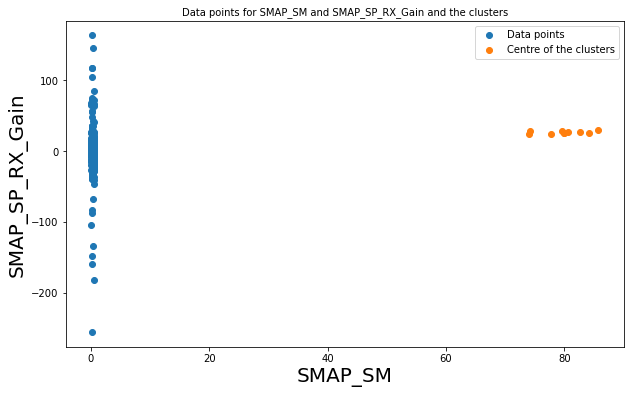

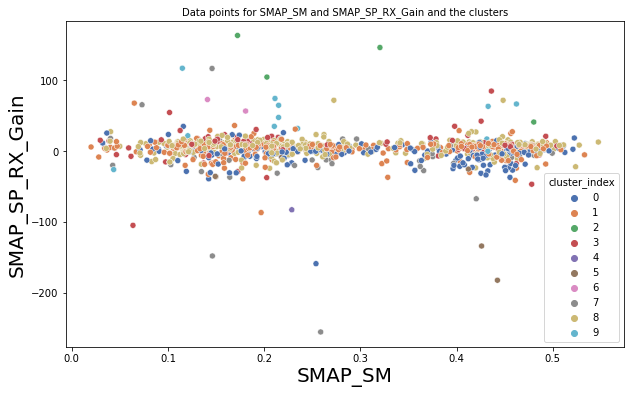

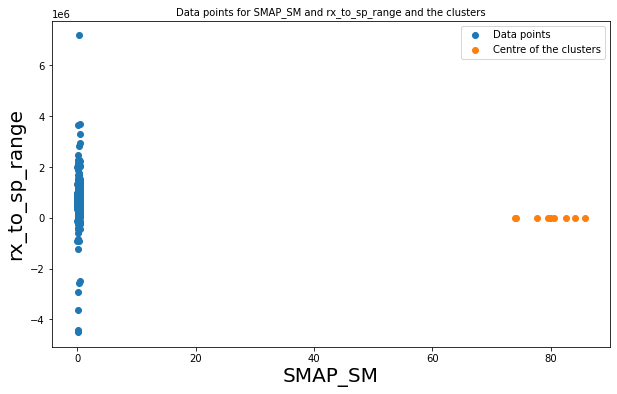

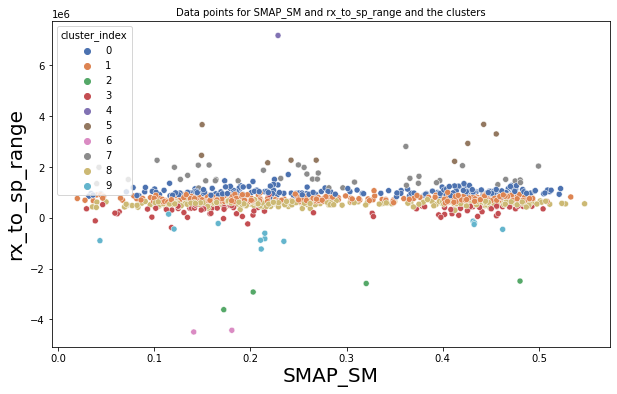

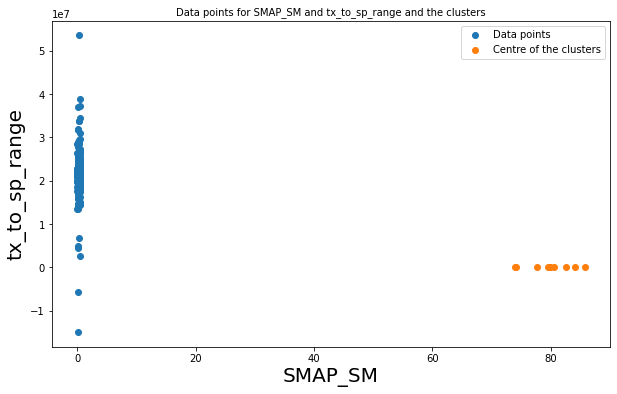

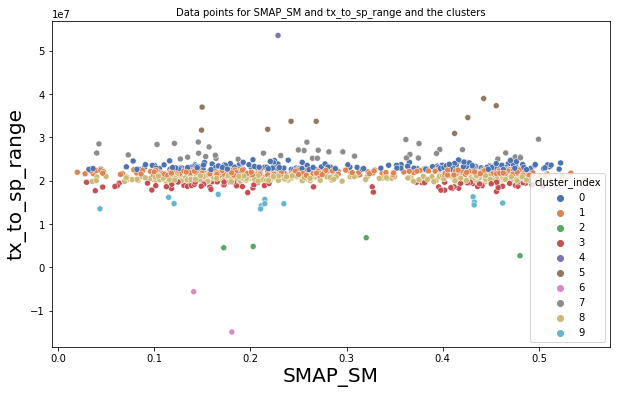

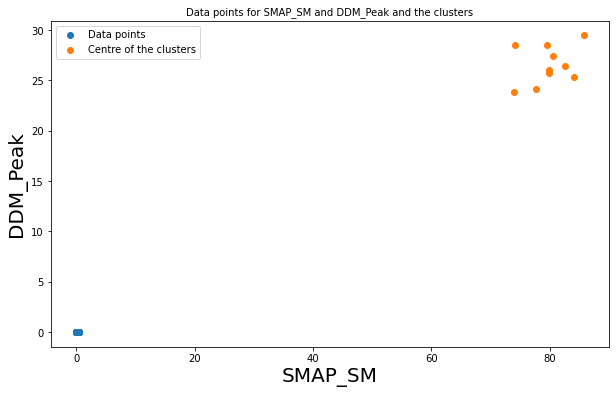

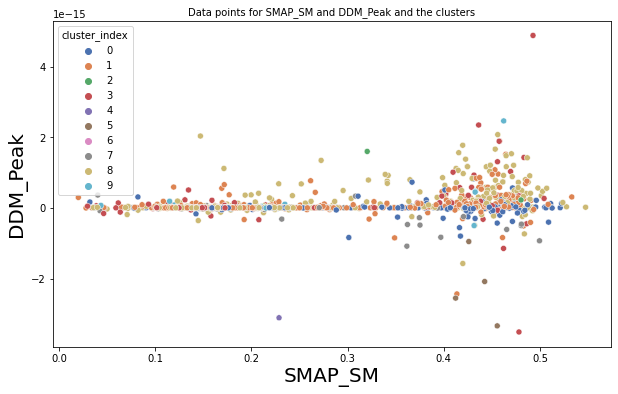

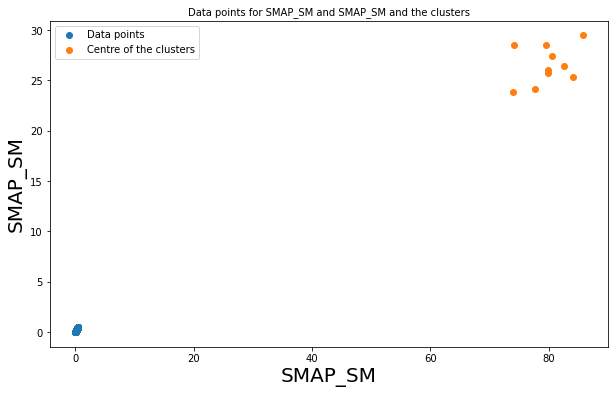

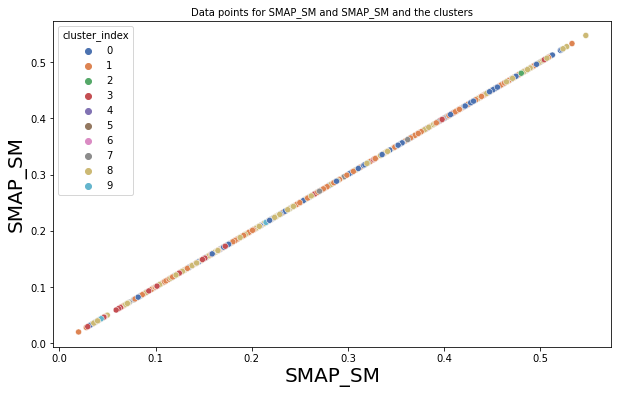

In [27]:
Plot_points_with_clusters(dataset,Keys)